# Team 5 Project: NBA Player Score Analytics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score, mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Load the Dataset

In [ ]:
df = pd.read_csv('2023_nba_player_stats.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
row, col = df.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 539 rows and 30 columns.


In [ ]:
# prompt: Provide an overview of your dataset, including its source, structure, and any
# preprocessing steps. Highlight any unique aspects or challenges related to the
# data that are crucial to your analysis. Plot some of the results

# Display the first few rows of the dataframe
print("First few rows of the dataframe: ")
df.head()

First few rows of the dataframe: 


PName POS Team  Age  GP   W   L     Min   PTS  FGM  ...  \
0             Jayson Tatum  SF  BOS   25  74  52  22  2732.2  2225  727  ...   
1              Joel Embiid   C  PHI   29  66  43  23  2284.1  2183  728  ...   
2              Luka Doncic  PG  DAL   24  66  33  33  2390.5  2138  719  ...   
3  Shai Gilgeous-Alexander  PG  OKC   24  68  33  35  2416.0  2135  704  ...   
4    Giannis Antetokounmpo  PF  MIL   28  63  47  16  2023.6  1959  707  ...   

   REB  AST  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  
0  649  342  213   78   51  160  3691   31    1  470  
1  670  274  226   66  112  205  3706   39    1  424  
2  569  529  236   90   33  166  3747   36   10  128  
3  329  371  192  112   65  192  3425    3    0  149  
4  742  359  246   52   51  197  3451   46    6  341  

[5 rows x 30 columns]

In [ ]:
# Get information on the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [ ]:
# Get summary statistics
df.describe()

Age          GP           W           L          Min  \
count  539.000000  539.000000  539.000000  539.000000   539.000000   
mean    25.970315   48.040816   24.018553   24.022263  1103.617625   
std      4.315513   24.650686   14.496366   13.445866   827.765114   
min     19.000000    1.000000    0.000000    0.000000     1.000000   
25%     23.000000   30.500000   12.000000   14.000000   329.000000   
50%     25.000000   54.000000   25.000000   25.000000   970.200000   
75%     29.000000   68.000000   36.000000   34.000000  1845.900000   
max     42.000000   83.000000   57.000000   60.000000  2963.200000   

               PTS         FGM          FGA         FG%         3PM  ...  \
count   539.000000  539.000000   539.000000  539.000000  539.000000  ...   
mean    523.426716  191.576994   403.005566   46.325232   56.324675  ...   
std     498.084360  178.351286   369.595909   10.967271   60.916821  ...   
min       0.000000    0.000000     0.000000    0.000000    0.000000  ...   
25%     120.500000   45.500000    93.500000   41.650000    5.000000  ...   
50%     374.000000  138.000000   300.000000   45.500000   36.000000  ...   
75%     769.500000  283.500000   598.500000   50.600000   92.000000  ...   
max    2225.000000  728.000000  1559.000000  100.000000  301.000000  ...   

              REB         AST         TOV         STL         BLK          PF  \
count  539.000000  539.000000  539.000000  539.000000  539.000000  539.000000   
mean   198.254174  115.545455   61.300557   33.270872   21.241187   91.181818   
std    181.819962  129.578453   58.279185   28.336745   26.529238   66.206731   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     50.500000   22.000000   14.500000    8.500000    5.000000   32.000000   
50%    159.000000   69.000000   44.000000   28.000000   13.000000   86.000000   
75%    286.000000  162.500000   92.500000   51.000000   28.000000  140.000000   
max    973.000000  741.000000  300.000000  128.000000  193.000000  279.000000   

                FP         DD2         TD3         +/-  
count   539.000000  539.000000  539.000000  539.000000  
mean   1036.938776    4.011132    0.220779    0.000000  
std     894.081896    8.770932    1.564432  148.223909  
min      -1.000000    0.000000    0.000000 -642.000000  
25%     254.000000    0.000000    0.000000  -70.000000  
50%     810.000000    0.000000    0.000000   -7.000000  
75%    1646.000000    3.000000    0.000000   57.000000  
max    3842.000000   65.000000   29.000000  640.000000  

[8 rows x 27 columns]

In [ ]:
df.isnull().sum()

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64

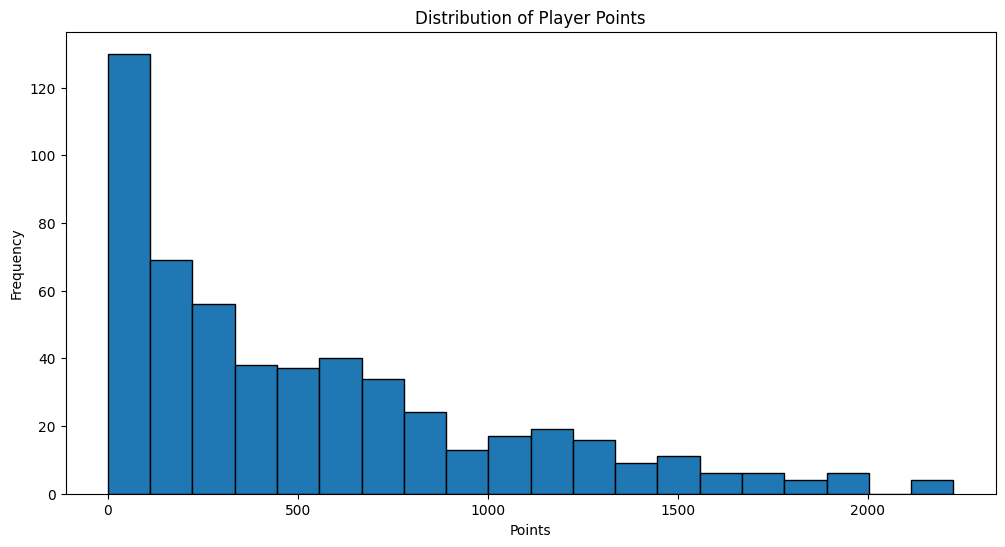

In [ ]:
# Visualize the distribution of key features

# Example 1: Histogram of player points
plt.figure(figsize=(12, 6))
plt.hist(df['PTS'], bins=20, edgecolor='black')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of Player Points')
plt.show()


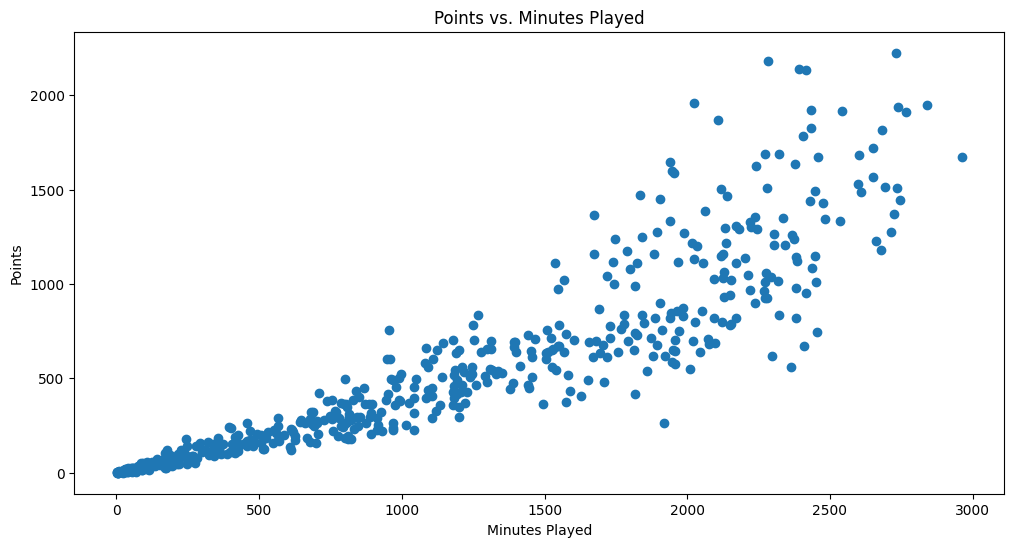

In [ ]:
# Example 2: Scatter plot of points vs. minutes played
plt.figure(figsize=(12, 6))
plt.scatter(df['Min'], df['PTS'])
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.title('Points vs. Minutes Played')
plt.show()

# # Example 4: Correlation Heatmap
# plt.figure(figsize=(12, 10))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()

# Example 5 - Interactive plot using plotly
# fig = px.scatter(df, x="MP", y="PTS", color="Pos", hover_data=['Player'])
# fig.show()

# Data Cleaning

In [ ]:
print("Number of duplicate data : ", df.duplicated().sum())

Number of duplicate data :  0


### The original column names are not very intuitive with all the abbreviations for general audiences, so let's start by renaming them to more intuitive names.

In [ ]:
df.rename(columns={
    'PName': 'Player_Name',
    'POS': 'Position',
    'Team': 'Team_Abbreviation',
    'Age': 'Age',
    'GP': 'Games_Played',
    'W': 'Wins',
    'L': 'Losses',
    'Min': 'Minutes_Played',
    'PTS': 'Total_Points',
    'FGM': 'Field_Goals_Made',
    'FGA': 'Field_Goals_Attempted',
    'FG%': 'Field_Goal_Percentage',
    '3PM': 'Three_Point_FG_Made',
    '3PA': 'Three_Point_FG_Attempted',
    '3P%': 'Three_Point_FG_Percentage',
    'FTM': 'Free_Throws_Made',
    'FTA': 'Free_Throws_Attempted',
    'FT%': 'Free_Throw_Percentage',
    'OREB': 'Offensive_Rebounds',
    'DREB': 'Defensive_Rebounds',
    'REB': 'Total_Rebounds',
    'AST': 'Assists',
    'TOV': 'Turnovers',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'PF': 'Personal_Fouls',
    'FP': 'NBA_Fantasy_Points',
    'DD2': 'Double_Doubles',
    'TD3': 'Triple_Doubles',
    '+/-': 'Plus_Minus'
}, inplace=True)

### Since 'Position' is the only column with missing values, we need to replace it with an existing value.

In [ ]:
df['Position'].value_counts(dropna=False)

Position
SG     96
C      78
PG     77
SF     77
PF     74
F      66
G      66
NaN     5
Name: count, dtype: int64

In [ ]:
df.loc[df['Position'].isnull()]

Player_Name Position Team_Abbreviation  Age  Games_Played  Wins  \
534    Alondes Williams      NaN               BKN   23             1     1   
535       Deonte Burton      NaN               SAC   29             2     1   
536       Frank Jackson      NaN               UTA   24             1     0   
537  Michael Foster Jr.      NaN               PHI   20             1     1   
538      Sterling Brown      NaN               LAL   28             4     2   

     Losses  Minutes_Played  Total_Points  Field_Goals_Made  ...  \
534       0             5.3             0                 0  ...   
535       1             6.5             0                 0  ...   
536       1             5.0             0                 0  ...   
537       0             1.0             0                 0  ...   
538       2            24.4             0                 0  ...   

     Total_Rebounds  Assists  Turnovers  Steals  Blocks  Personal_Fouls  \
534               1        0          2       0       0               1   
535               0        0          0       0       0               0   
536               2        1          0       0       0               0   
537               0        0          0       0       0               0   
538               8        2          0       3       0               4   

     NBA_Fantasy_Points  Double_Doubles  Triple_Doubles  Plus_Minus  
534                  -1               0               0          -5  
535                   0               0               0           5  
536                   4               0               0          -2  
537                   0               0               0          -2  
538                  22               0               0          -4  

[5 rows x 30 columns]

### As we can see, even though there are missing values for 'Position', there are only 5 such records. A closer search online of these five players show that they possess different positions across different seasons, so we will fill the missing values here with the most common group which is 'SG' (shooting guard).


In [ ]:
df['Position'].fillna('SG', inplace=True)

In [ ]:
df['Position'].value_counts()

Position
SG    101
C      78
SF     77
PG     77
PF     74
F      66
G      66
Name: count, dtype: int64


### However, it is worth noting that this also possess an underlying bias for our dataset since players in different positions carry out different functionalities under a team perspective (e.g. not every player will focus on scoring as that will leave defense or other functions short-handed), and thus different positions will exhibit different scoring distributions.



### The visualization attached below supports such idea:

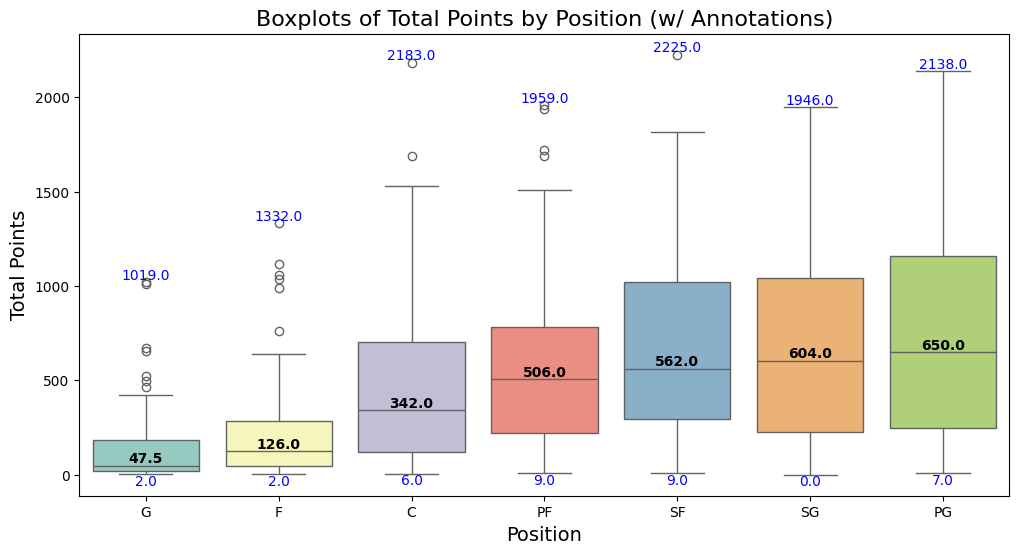

In [ ]:
# View boxplots by increasing median of 'Total_Points' for convenience
median_order = df.groupby('Position')['Total_Points'].median().sort_values()
df['Position'] = pd.Categorical(df['Position'], categories=median_order.index, ordered=True)

plt.figure(figsize=(12, 6))
box_plot = sns.boxplot(data=df, x='Position', y='Total_Points', palette='Set3')

positions = df['Position'].cat.categories
for i, pos in enumerate(positions):
    # Extract values for the current group. Removed Q1 and Q3 values for clarity
    group_data = df[df['Position'] == pos]['Total_Points']
    median = group_data.median()
    min_val = group_data.min()
    max_val = group_data.max()

    # Add annotations above the plot for each statistic
    plt.text(i, min_val, f'{min_val:.1f}', ha='center', va='top', fontsize=10, color='blue')
    plt.text(i, median, f'{median:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    plt.text(i, max_val, f'{max_val:.1f}', ha='center', va='bottom', fontsize=10, color='blue')

plt.title('Boxplots of Total Points by Position (w/ Annotations)', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Total Points', fontsize=14)

plt.show()

### As we can see from the boxplots above, players who belong to the 'Position' of 'G' (Guard: general designation for players who can play as a 'PG' or 'SG') or 'F' (Forward: general dsignation for players who can play as a 'PF' or 'SF') has median total points significantly lower to those in other more specialized groups

### The same trend/distribution holds true for the average 'Total_Points' when examined by 'Position' groups.

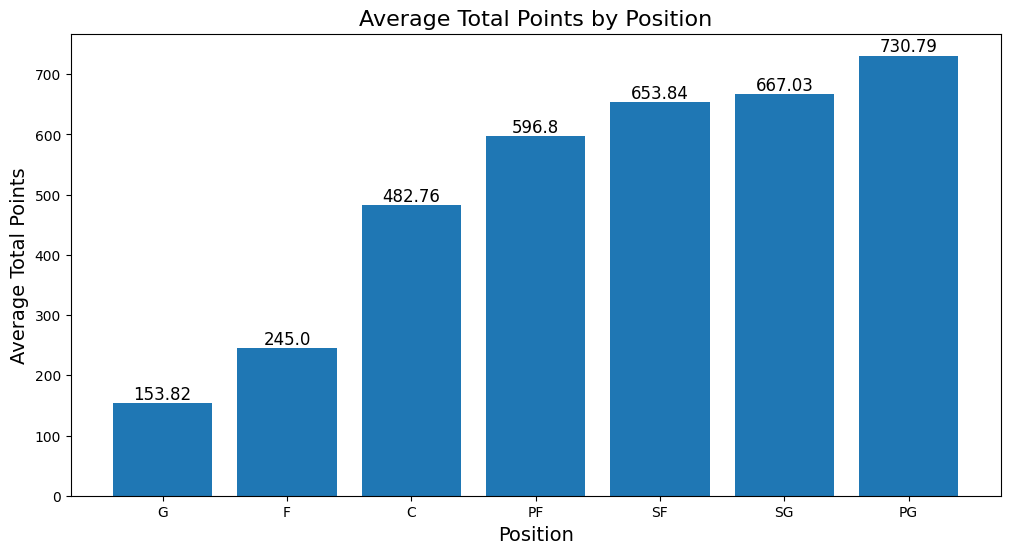

In [ ]:
colors = ['orangered', 'white', 'grey', 'orangered', 'white', 'grey', 'orangered']
position_stats = df.groupby('Position')['Total_Points'].mean().reset_index()
# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(position_stats['Position'], position_stats['Total_Points'])

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, f'{round(height, 2)}', ha="center", va="bottom", fontsize=12, color='black')

plt.title('Average Total Points by Position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Average Total Points', fontsize=14)

plt.show()

# Additional Data Analysis & Visualization on top of our work from Milestone+Presentaiton

## Correlation Matrix of Original Numerical Columns

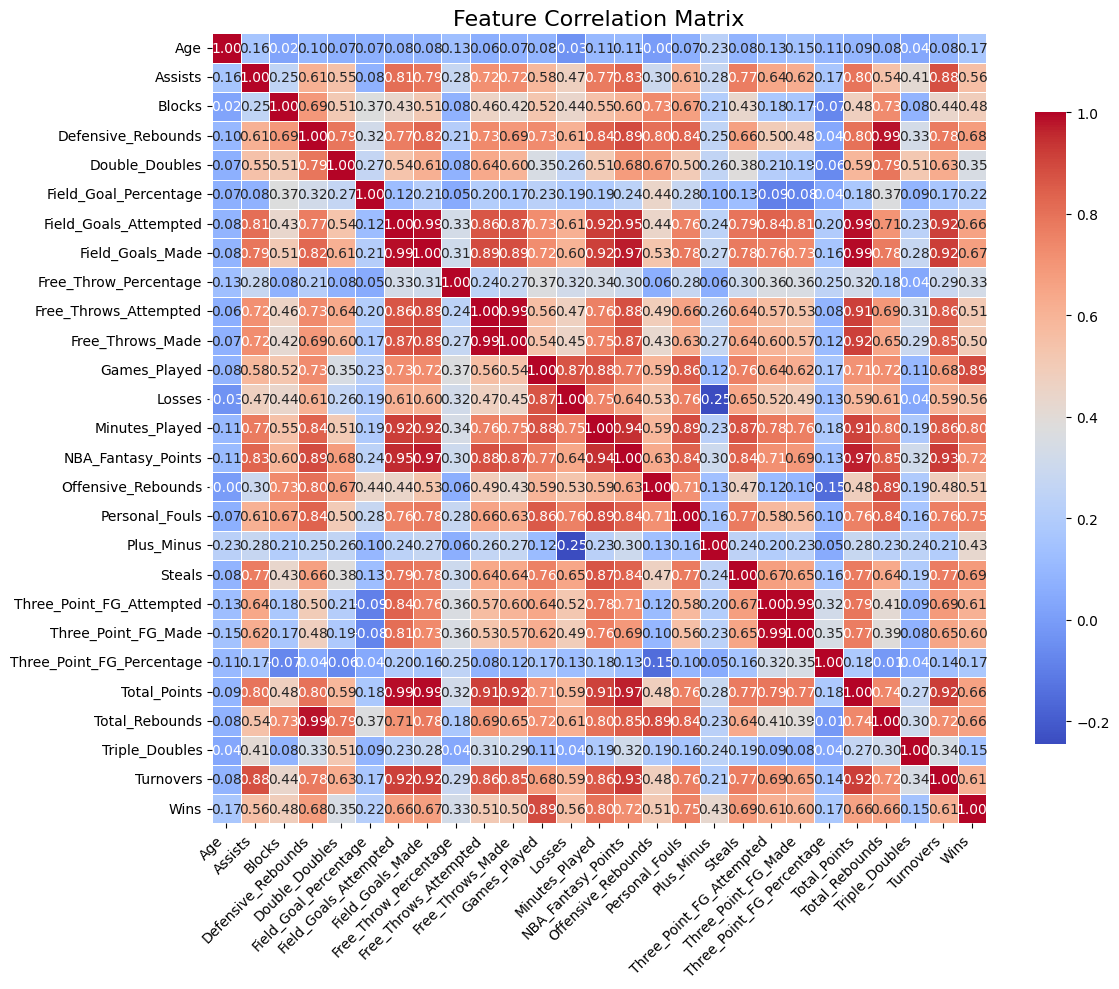

In [ ]:
corr_matrix_df = df[df.columns.difference(['Player_Name','Position','Team_Abbreviation'])]

# Assuming `df` is your DataFrame with 25 features
correlation_matrix = corr_matrix_df.corr()

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,                 # Add values inside squares
    fmt=".2f",                  # Format values to 2 decimal places
    cmap="coolwarm",            # Use a clear colormap
    linewidths=0.5,             # Add grid lines
    cbar_kws={"shrink": 0.8},   # Shrink colorbar size
    xticklabels=correlation_matrix.columns,  # Add column names as labels
    yticklabels=correlation_matrix.columns   # Add row names as labels
)

# Add title and show the plot
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()                   # Adjust layout for better fit
plt.show()


## Correlation Matrix of Normalized Features based 'Division of Total_Points' - Peter

### Max suggested to us that we can try out normalize 15 game-related numerical columns we used to run our previous models by dividing relevant columns with 'Total_Minutes_Played'.

### In our original analyses, both 'Free_Throws_Made' and 'Free_Throw_Percentage' were used as explanatory variables. For the new analyses, I decide to include 'Three_Point_FG_Percentage' and exclude 'Free_Throws_Made' since 'Free_Throw_Percentage' is a value calculated from 'Free_Throws_Made'.

### Also only game-related statistics are kept since we are normalizing by 'Minutes_Played'.

In [ ]:
outliers_condition = ((df['Field_Goal_Percentage'] > 90) |
                      (df['Field_Goal_Percentage'] == 0) |
                      (df['Three_Point_FG_Percentage'] > 90) |
                      (df['Three_Point_FG_Percentage'] == 0) |
                      (df['Free_Throw_Percentage'] == 0))

corr_matrix_norm_df = df[~outliers_condition]

corr_matrix_norm_df.drop(columns=['Age', 'Player_Name', 'Position', 'Team_Abbreviation', 'Field_Goals_Made', 'Field_Goals_Attempted', 'Three_Point_FG_Made',
                 'Three_Point_FG_Attempted', 'Free_Throws_Made', 'NBA_Fantasy_Points', 'Double_Doubles','Free_Throws_Attempted',
                 'Triple_Doubles', 'Offensive_Rebounds', 'Defensive_Rebounds'],
        inplace=True)

corr_matrix_norm_df.columns

Index(['Games_Played', 'Wins', 'Losses', 'Minutes_Played', 'Total_Points',
       'Field_Goal_Percentage', 'Three_Point_FG_Percentage',
       'Free_Throw_Percentage', 'Total_Rebounds', 'Assists', 'Turnovers',
       'Steals', 'Blocks', 'Personal_Fouls', 'Plus_Minus'],
      dtype='object')

In [ ]:
corr_matrix_norm_df.head(3)

Games_Played  Wins  Losses  Minutes_Played  Total_Points  \
0            74    52      22          2732.2          2225   
1            66    43      23          2284.1          2183   
2            66    33      33          2390.5          2138   

   Field_Goal_Percentage  Three_Point_FG_Percentage  Free_Throw_Percentage  \
0                   46.6                       35.0                   85.4   
1                   54.8                       33.0                   85.7   
2                   49.6                       34.2                   74.2   

   Total_Rebounds  Assists  Turnovers  Steals  Blocks  Personal_Fouls  \
0             649      342        213      78      51             160   
1             670      274        226      66     112             205   
2             569      529        236      90      33             166   

   Plus_Minus  
0         470  
1         424  
2         128

In [ ]:
temp = corr_matrix_norm_df['Minutes_Played']
corr_matrix_norm_df = corr_matrix_norm_df.div(corr_matrix_norm_df['Minutes_Played'], axis=0)
corr_matrix_norm_df['Minutes_Played'] = temp
corr_matrix_norm_df.head(3)

Games_Played      Wins    Losses  Minutes_Played  Total_Points  \
0      0.027084  0.019032  0.008052          2732.2      0.814362   
1      0.028895  0.018826  0.010070          2284.1      0.955737   
2      0.027609  0.013805  0.013805          2390.5      0.894374   

   Field_Goal_Percentage  Three_Point_FG_Percentage  Free_Throw_Percentage  \
0               0.017056                   0.012810               0.031257   
1               0.023992                   0.014448               0.037520   
2               0.020749                   0.014307               0.031040   

   Total_Rebounds   Assists  Turnovers    Steals    Blocks  Personal_Fouls  \
0        0.237538  0.125174   0.077959  0.028548  0.018666        0.058561   
1        0.293332  0.119960   0.098945  0.028895  0.049035        0.089751   
2        0.238026  0.221293   0.098724  0.037649  0.013805        0.069442   

   Plus_Minus  
0    0.172023  
1    0.185631  
2    0.053545

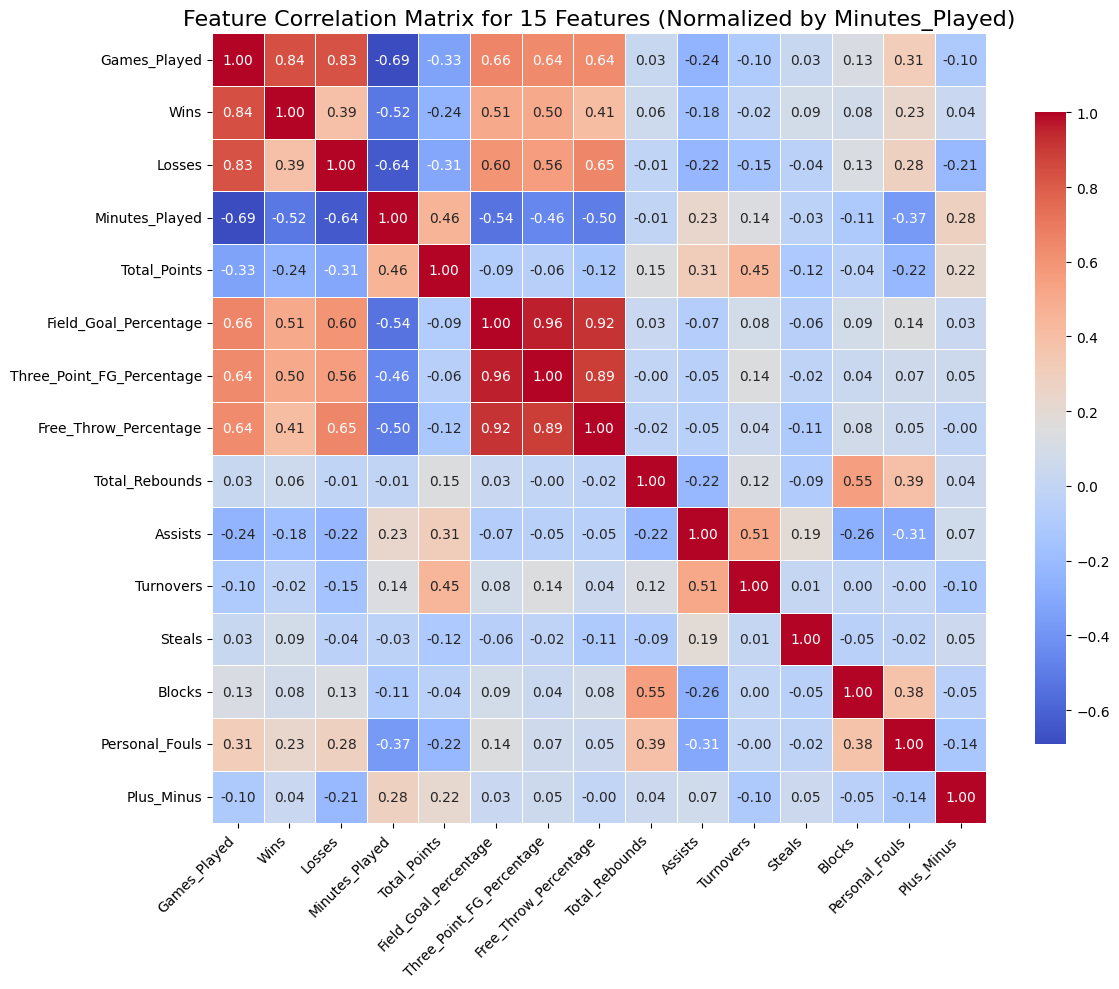

In [ ]:
correlation_matrix_norm = corr_matrix_norm_df.corr()

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(
    correlation_matrix_norm,
    annot=True,                 # Add values inside squares
    fmt=".2f",                  # Format values to 2 decimal places
    cmap="coolwarm",            # Use a clear colormap
    linewidths=0.5,             # Add grid lines
    cbar_kws={"shrink": 0.8},   # Shrink colorbar size
    xticklabels=correlation_matrix_norm.columns,  # Add column names as labels
    yticklabels=correlation_matrix_norm.columns   # Add row names as labels
)

# Add title and show the plot
plt.title("Feature Correlation Matrix for 15 Features (Normalized by Minutes_Played)", fontsize=16)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()                   # Adjust layout for better fit
plt.show()

In [ ]:
peter_model = DecisionTreeRegressor()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_mse = float('+inf')
best_prediction = None
best_split = None

X = corr_matrix_norm_df.drop(['Total_Points', 'Minutes_Played'], axis=1)
y = corr_matrix_norm_df['Total_Points']

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        peter_model.fit(X_train, y_train)
        y_pred = peter_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_test_size = test_size
            best_random_state = random_state
            best_prediction = y_pred
            best_split = (X_train, X_test, y_train, y_test)

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best MSE value: {best_mse}")
print(f"Best prediction: {best_prediction}, length: {len(best_prediction)}")

feature_importances = pd.Series(peter_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("\nMost important features according to the model: ")
print(feature_importances)

Best test size: 0.15
Best random state: 100
Best MSE value: 0.0132775144213377
Best prediction: [0.55248619 0.27851569 0.45389049 0.21276596 0.29744449 0.22139694
 0.5108951  0.29411765 0.38570752 0.39329465 0.45389049 0.30378534
 0.30075188 0.54202077 0.38202247 0.4205795  0.27851569 0.50112687
 0.46734493 0.23579436 0.63923955 0.3327352  0.23579436 0.20352782
 0.67716535 0.23740003 0.47762478 0.46734493 0.60841849 0.30187904
 0.22738757 0.57346026 0.50203316 0.46734493 0.34345225 0.43551259
 0.37446505 0.3517707  0.75333569 0.42384243 0.459395   0.78862044
 0.36497028 0.27841114 0.37447989 0.65024568 0.49764115 0.53536755
 0.43551259 0.38950893 0.59814879 0.55248619 0.39355483 0.81436205
 0.35971223 0.34029851 0.21276596 0.51484326 0.51248514 0.3517707
 0.62810985 0.30212014 0.60164924 0.459395   0.59288538 0.34345225
 0.47316205 0.43430563 0.70726628 0.54520651 0.22139694], length: 71

Most important features according to the model: 
Games_Played                 0.494449
Turnovers  

In [ ]:
for split in best_split:
  print(split.shape)

(399, 13)
(71, 13)
(399,)
(71,)


In [ ]:
predicted_df = pd.DataFrame({
    "Original_Index": best_split[3].index,
    "Actual_Target": best_split[3],
    "Predicted_Target": best_prediction,
})
print(predicted_df)

     Original_Index  Actual_Target  Predicted_Target
391             391       0.396040          0.552486
90               90       0.453276          0.278516
365             365       0.370607          0.453890
502             502       0.444444          0.212766
465             465       0.316901          0.297444
..              ...            ...               ...
472             472       0.338573          0.473162
146             146       0.380835          0.434306
56               56       0.548153          0.707266
191             191       0.268541          0.545207
343             343       0.348837          0.221397

[71 rows x 3 columns]


In [ ]:
merged_df = df.join(predicted_df, how='inner')
merged_df_by_prediction = merged_df.sort_values(by=['Predicted_Target', 'Minutes_Played'], ascending=[False, True])

merged_df_by_prediction.head(int(len(merged_df_by_prediction) * 0.1))

Player_Name Position Team_Abbreviation  Age  Games_Played  Wins  \
7    Donovan Mitchell       SG               CLE   26            68    44   
20      Stephen Curry       PG               GSW   35            56    30   
23          Ja Morant       PG               MEM   23            61    40   
56   D'Angelo Russell       PG               LAL   27            71    39   
22       Kyrie Irving       PG               DAL   31            60    32   
232    Taurean Prince       PF               MIN   29            54    31   
69       Bradley Beal       SG               WAS   29            50    24   

     Losses  Minutes_Played  Total_Points  Field_Goals_Made  ...  Steals  \
7        24          2432.4          1922               679  ...      99   
20       26          1941.2          1648               559  ...      52   
23       21          1948.3          1596               566  ...      66   
56       32          2304.1          1263               445  ...      70   
22       28          2240.6          1623               594  ...      66   
232      23          1192.5           493               177  ...      28   
69       26          1672.9          1160               444  ...      45   

     Blocks  Personal_Fouls  NBA_Fantasy_Points  Double_Doubles  \
7        27             168                2918               5   
20       20             117                2622              12   
23       16             100                2804              20   
56       29             140                2288               9   
22       45             165                2689               5   
232      15             123                 837               0   
69       33             107                1891               2   

     Triple_Doubles  Plus_Minus  Original_Index  Actual_Target  \
7                 0         338               7       0.790166   
20                1         268              20       0.848959   
23                7         302              23       0.819176   
56                0          85              56       0.548153   
22                0         222              22       0.724360   
232               0           0             232       0.413417   
69                0          42              69       0.693407   

     Predicted_Target  
7            0.814362  
20           0.788620  
23           0.753336  
56           0.707266  
22           0.677165  
232          0.650246  
69           0.639240  

[7 rows x 33 columns]

### At the time of writing this report, it looks like the 'underdog' in our case is Taurean Prince who has a points rank of 232/539 and a scoring potential of 282 points, which is calculated by (0.650246 - 0.413417) * 1192.5

# Propensity Score Matching - Gangming

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Define covariates (adjust according to your analysis needs)
covariates = ['Age', 'Minutes_Played', 'Field_Goal_Percentage', 'Assists', 'Total_Rebounds', 'Steals', 'Blocks']

# Drop rows with missing values in selected columns
df_for_psm = df.dropna(subset=covariates + ['Position'])

# Get all unique positions
unique_positions = df_for_psm['Position'].unique()

# Loop over all positions, treating each as "treated" group in turn
for pos in unique_positions:
    print("="*60)
    print(f"Analyzing position: {pos}")

    # Create a binary treatment indicator for the current position
    df_for_psm['is_treated'] = np.where(df_for_psm['Position'] == pos, 1, 0)

    # Fit a logistic regression model to estimate propensity scores
    logit = LogisticRegression(max_iter=1000)
    logit.fit(df_for_psm[covariates], df_for_psm['is_treated'])

    # Predict propensity scores
    df_for_psm['propensity_score'] = logit.predict_proba(df_for_psm[covariates])[:, 1]

    # Separate treated and control groups
    treated = df_for_psm[df_for_psm['is_treated'] == 1].copy()
    control = df_for_psm[df_for_psm['is_treated'] == 0].copy()

    matched_pairs = []
    used_controls = set()  # Keep track of matched control units

    # Perform nearest neighbor matching with a caliper
    caliper = 0.05
    for idx, row in treated.iterrows():
        t_score = row['propensity_score']

        # Filter out already matched control samples
        available_control = control[~control.index.isin(used_controls)].copy()
        if available_control.empty:
            # No available controls left
            break

        # Calculate absolute difference in propensity score
        available_control['diff'] = (available_control['propensity_score'] - t_score).abs()

        # Apply caliper constraint
        available_control = available_control[available_control['diff'] <= caliper]
        if available_control.empty:
            # No control units within the caliper limit
            continue

        # Select the best match (closest propensity score)
        best_match = available_control.loc[available_control['diff'].idxmin()]

        # Record matched pairs
        matched_pairs.append((idx, best_match.name))
        used_controls.add(best_match.name)

    # Build a matched dataset
    matched_treated_indices = [x[0] for x in matched_pairs]
    matched_control_indices = [x[1] for x in matched_pairs]
    matched_df = pd.concat([df_for_psm.loc[matched_treated_indices], df_for_psm.loc[matched_control_indices]])

    # Check the matched sample size
    matched_treated = matched_df[matched_df['is_treated'] == 1]
    matched_control = matched_df[matched_df['is_treated'] == 0]

    print(f'Matched sample size: {matched_treated.shape[0]} (treated), {matched_control.shape[0]} (control)')

    # Check balance after matching (mean comparison for covariates)
    print("Mean comparison of covariates (treated vs. control) after matching:")
    for var in covariates:
        t_mean = matched_treated[var].mean()
        c_mean = matched_control[var].mean()
        print(f"{var}: Treated mean = {t_mean:.2f}, Control mean = {c_mean:.2f}")

    # Estimate the treatment effect on Total_Points
    treated_points = matched_treated['Total_Points'].mean()
    control_points = matched_control['Total_Points'].mean()
    estimated_effect = treated_points - control_points

    print(f"Estimated treatment effect of being {pos} on total points: {estimated_effect:.2f}")


Analyzing position: SF
Matched sample size: 76 (treated), 76 (control)
Mean comparison of covariates (treated vs. control) after matching:
Age: Treated mean = 26.95, Control mean = 26.30
Minutes_Played: Treated mean = 1382.84, Control mean = 1362.99
Field_Goal_Percentage: Treated mean = 45.74, Control mean = 45.08
Assists: Treated mean = 116.47, Control mean = 111.71
Total_Rebounds: Treated mean = 221.67, Control mean = 216.01
Steals: Treated mean = 40.88, Control mean = 40.01
Blocks: Treated mean = 21.93, Control mean = 19.71
Estimated treatment effect of being SF on total points: 13.95
Analyzing position: C
Matched sample size: 53 (treated), 53 (control)
Mean comparison of covariates (treated vs. control) after matching:
Age: Treated mean = 26.51, Control mean = 26.92
Minutes_Played: Treated mean = 1002.37, Control mean = 716.05
Field_Goal_Percentage: Treated mean = 52.79, Control mean = 54.39
Assists: Treated mean = 83.19, Control mean = 57.51
Total_Rebounds: Treated mean = 291.08, 

----

# Relationship between Position and Score

From the matched results, we conducted propensity score matching (PSM) for each position and estimated the effect of each position relative to others (used as the control group) on players' total points (Total_Points). Several points should be noted:
## What is Propensity Score Matching (PSM)?

Propensity Score Matching (PSM) is a statistical technique used in observational studies to estimate causal effects by reducing selection bias. In scenarios where randomized controlled trials (RCTs) are impractical or unethical, PSM provides a way to approximate experimental conditions by balancing covariates between a treatment group and a control group.

### Key Concepts:

1. **Propensity Score**:  
   The propensity score is the probability of an individual receiving a treatment or intervention, given their observed covariates. It is typically estimated using logistic regression or other machine learning methods.

2. **Matching**:  
   After calculating the propensity scores, individuals in the treatment group are matched with individuals in the control group who have similar scores. This matching creates a pseudo-randomized dataset where the covariates are balanced between groups.

3. **Balance**:  
   PSM aims to balance observed covariates between the groups, ensuring that differences in outcomes can be attributed to the treatment rather than confounding factors.

## Matching Quality and Balance:

1. **Comparison of Covariate Means Post-Matching**:  
   In most cases, the mean values of covariates between the treatment group and control group are relatively close after matching. For instance, in positions such as SF (Small Forward), SG (Shooting Guard), and PG (Point Guard), the mean differences in covariates like Age, Minutes_Played, and Assists are minimal. This suggests that PSM has effectively controlled for these potential confounders to some extent, making comparisons more reasonable.

2. **Exceptions in Some Positions**:  
   However, certain positions require attention. For example, in the C (Center) position, there remains a significant difference in Minutes_Played between the control group and the treatment group after matching (1002 vs. 716). This indicates potential imbalance or insufficient data even after matching.

---

## Estimated Score Impact by Position:

- **SF (Small Forward)**: +10.34  
- **C (Center)**: +169.36  
- **PG (Point Guard)**: -6.70  
- **PF (Power Forward)**: +37.65  
- **SG (Shooting Guard)**: +70.03  
- **F (Forward)**: +50.80  
- **G (Guard)**: -11.79  

The results show that the impact of the C (Center) position is exceptionally large (+169.36). SG (Shooting Guard), PF (Power Forward), F (Forward), and SF (Small Forward) also exhibit varying degrees of positive impact. These differences may be attributed to the unique tactical roles, playing time, scoring opportunities, and team strategies associated with these positions.

In contrast, PG (Point Guard) and G (Guard, broadly defined) show negative impact values. This suggests that under the current matching conditions, players in these positions have no scoring advantage compared to the control group, and may even score slightly less. This could be because point guards are more focused on playmaking and ball distribution rather than personal scoring. Thus, after controlling for other covariates, the "position" itself may not significantly enhance total points and might even show a slight negative effect.

---

## Possible Explanations and Limitations:

### **Explanations**:
- If the data and model are reliable, these results may indicate that, within the current season or data sample, certain positions (e.g., C, SG) are more likely to achieve higher total points. Even after controlling for factors like age, playing time, shooting accuracy, assists, rebounds, steals, and blocks, the "position" still has an impact on scoring.

### **Limitations**:
1. **Incomplete Control of Confounders**:  
   The covariates used (e.g., age, playing time) may not fully account for all potential confounders. Factors like team style, teammate quality, injuries, coaching strategies, and players' individual skills could also influence scoring but are not included in this analysis.

2. **Imbalance in Matching Quality**:  
   In some matched results (e.g., for Centers), large differences persist, indicating suboptimal matching quality.





----

# Analysis of Correlation Between Points and Other Factors - Zhongming & Junyuan


### Examination of Total Points vs. Total Rebounds

In [ ]:
outliers_condition = ((df['Field_Goal_Percentage'] > 90) |
                      (df['Field_Goal_Percentage'] == 0) |
                      (df['Three_Point_FG_Percentage'] > 90) |
                      (df['Three_Point_FG_Percentage'] == 0) |
                      (df['Free_Throw_Percentage'] == 0))

df = df[~outliers_condition]

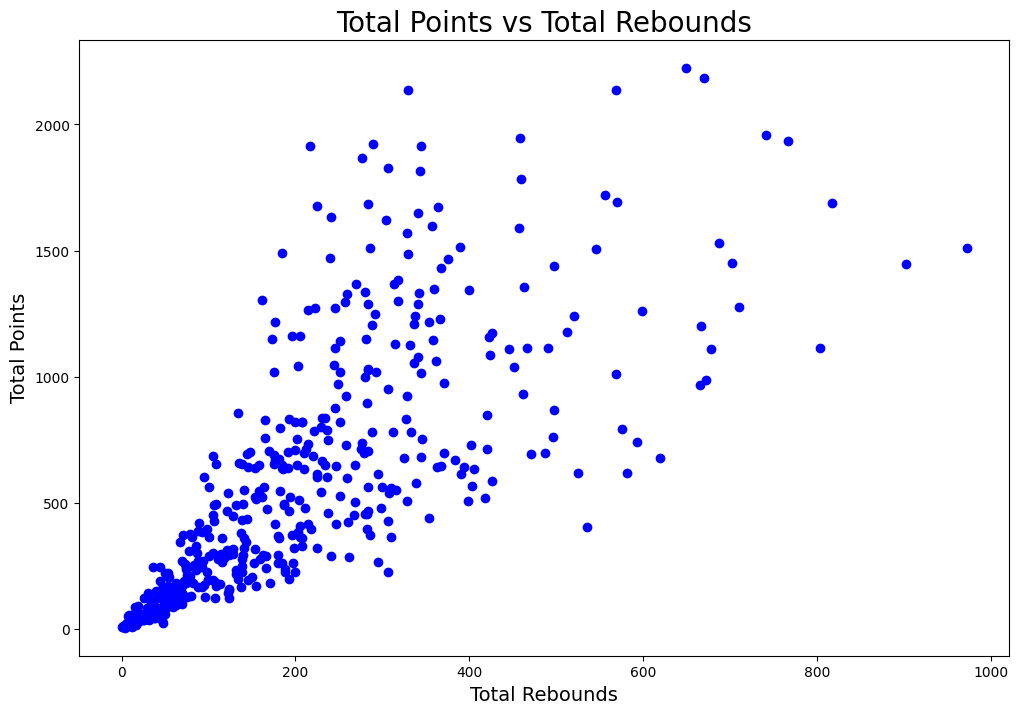

0.7597062682675928


In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Total_Rebounds'], df['Total_Points'], color='blue')

# Set the title and labels
plt.title('Total Points vs Total Rebounds', fontsize=20)
plt.xlabel('Total Rebounds', fontsize=14)
plt.ylabel('Total Points', fontsize=14)

# Show the plot
plt.show()

correlation = df[['Total_Points', 'Total_Rebounds']].corr().at['Total_Points', 'Total_Rebounds']
print(correlation)

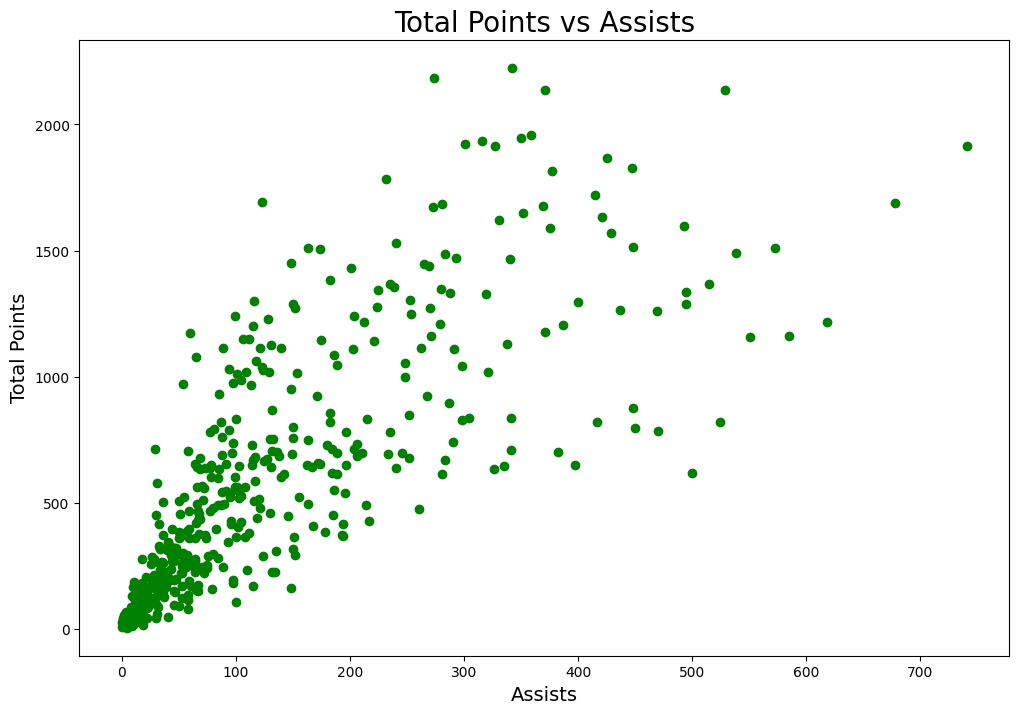

0.7830955154771233


In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Assists'], df['Total_Points'], color='green')

# Set the title and labels
plt.title('Total Points vs Assists', fontsize=20)
plt.xlabel('Assists', fontsize=14)
plt.ylabel('Total Points', fontsize=14)

# Show the plot
plt.show()

correlation = df[['Total_Points', 'Assists']].corr().at['Total_Points', 'Assists']
print(correlation)

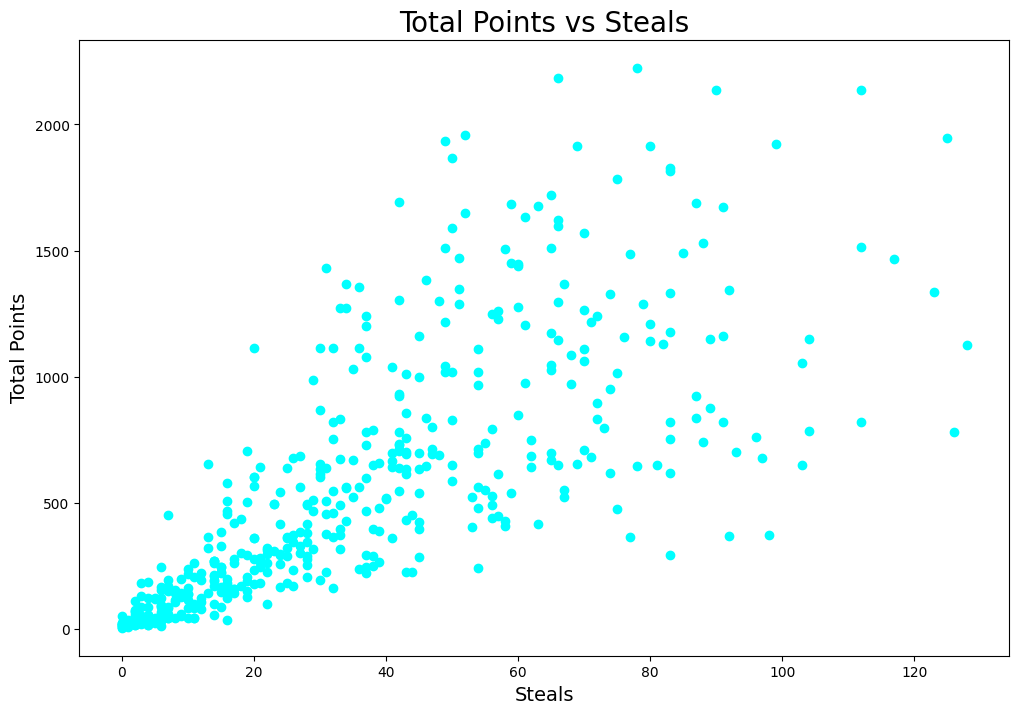

0.7502556348091602


In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Steals'], df['Total_Points'], color='cyan')

# Set the title and labels
plt.title('Total Points vs Steals', fontsize=20)
plt.xlabel('Steals', fontsize=14)
plt.ylabel('Total Points', fontsize=14)

# Show the plot
plt.show()

correlation = df[['Total_Points', 'Steals']].corr().at['Total_Points', 'Steals']
print(correlation)

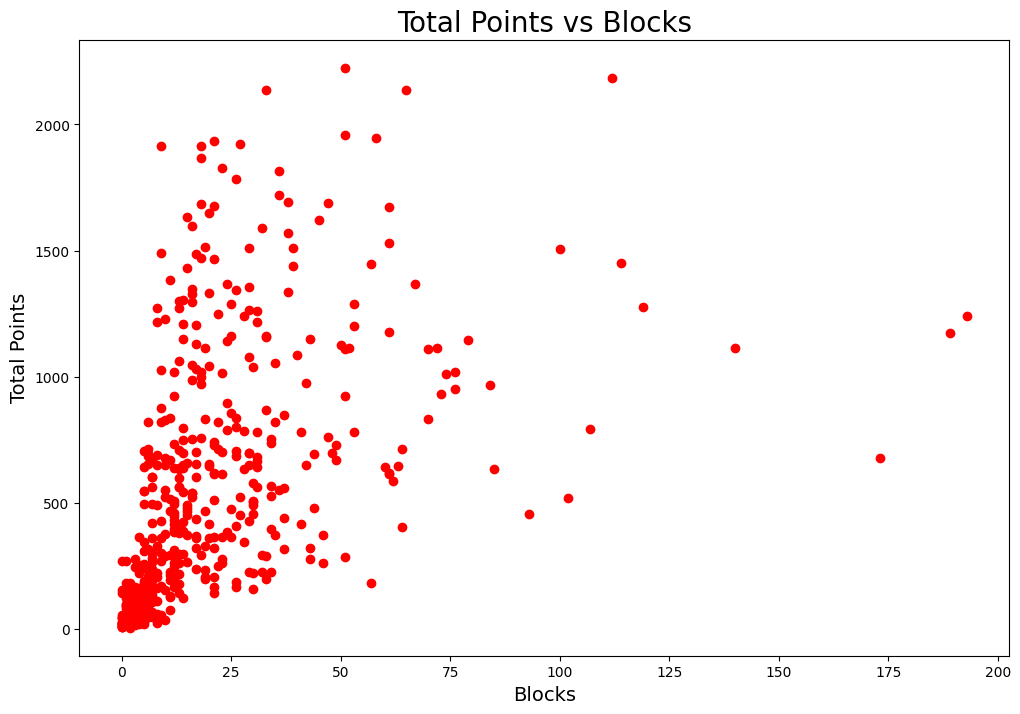

0.47506997450402844


In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Blocks'], df['Total_Points'], color='red')

# Set the title and labels
plt.title('Total Points vs Blocks', fontsize=20)
plt.xlabel('Blocks', fontsize=14)
plt.ylabel('Total Points', fontsize=14)

# Show the plot
plt.show()

correlation = df[['Total_Points', 'Blocks']].corr().at['Total_Points', 'Blocks']
print(correlation)

In [ ]:
# df.drop(columns=['Player_Name', 'Position', 'Team_Abbreviation', 'Field_Goals_Made', 'Field_Goals_Attempted', 'Three_Point_FG_Made',
#                  'Three_Point_FG_Attempted', 'Three_Point_FG_Percentage', 'NBA_Fantasy_Points', 'Double_Doubles','Free_Throws_Attempted',
#                  'Triple_Doubles', 'Offensive_Rebounds', 'Defensive_Rebounds'],
#         inplace=True)

In [ ]:
# X = df.drop('Total_Points',axis = 1)
# y = df['Total_Points']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
# row, col = X_train.shape
# print("X_train have",row,"rows and",col,"columns.")
# row, col = X_test.shape
# print("X_test have",row,"rows and",col,"columns.")

G
F
C
PF
SF
SG
PG
Correlation between Total Points and Total Rebounds by Position:
C     0.900348
F     0.890737
G     0.877109
PF    0.866848
PG    0.853196
SF    0.807715
SG    0.775663
Name: Correlation(Points, Rebounds), dtype: float64


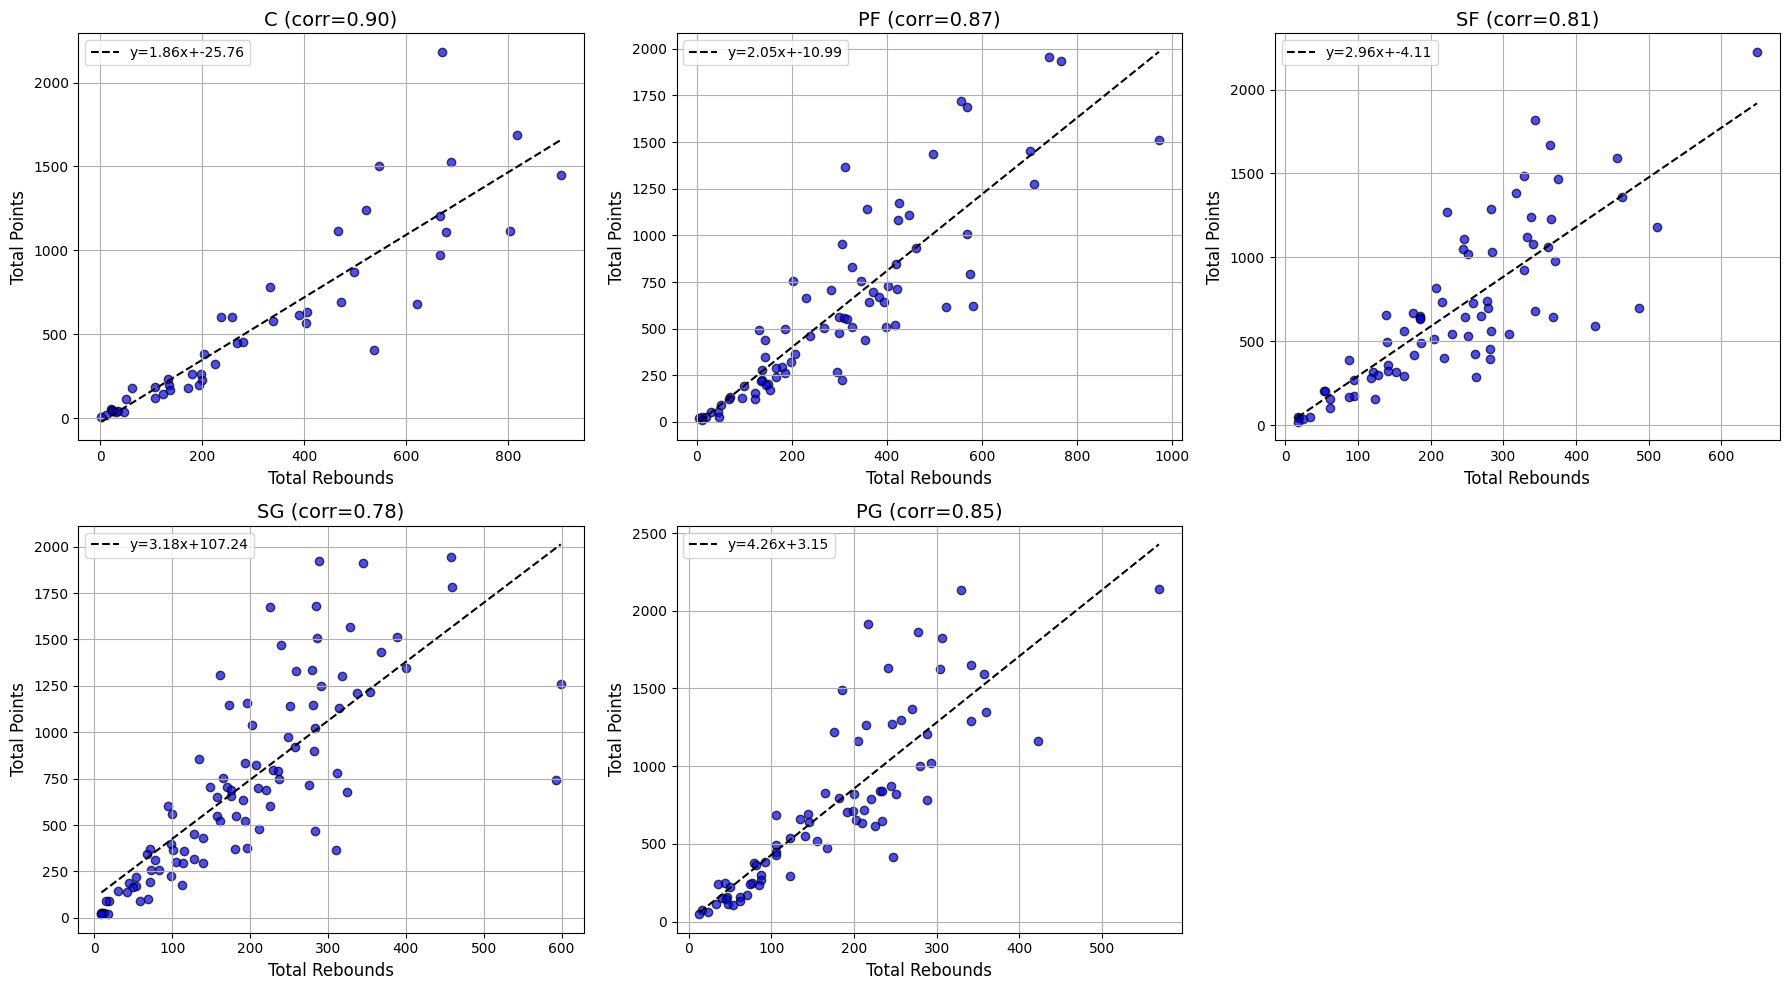


Average Total Rebounds and Total Points by Position:
          Total_Rebounds  Total_Points
Position                              
C             310.375000    552.791667
PF            299.383562    602.876712
SF            233.835616    688.424658
SG            193.806452    723.860215
PG            176.675676    755.837838
F             131.767857    275.553571
G              63.264151    188.094340


In [ ]:
grouped = df.groupby('Position')
result3 = {}
for pos, group in grouped:
    print(pos)
    if group['Total_Points'].count() > 1:
        correlation = group[['Total_Points', 'Total_Rebounds']].corr().at['Total_Points', 'Total_Rebounds']
    else:
        correlation = np.nan
    result3[pos] = correlation
corr_series = pd.Series(result3, name='Correlation(Points, Rebounds)').sort_values(ascending=False)
print("Correlation between Total Points and Total Rebounds by Position:")
print(corr_series)
positions_to_plot = ['C', 'PF', 'SF', 'SG', 'PG']

# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, pos in enumerate(positions_to_plot):
    ax = axes[i]
    subset = df[df['Position'] == pos]


    ax.scatter(subset['Total_Rebounds'], subset['Total_Points'], alpha=0.7, color='blue', edgecolors='black')

    # Fit a simple linear regression line to show trend
    # Avoid errors if too few points
    if len(subset) > 2:
        slope, intercept = np.polyfit(subset['Total_Rebounds'], subset['Total_Points'], 1)
        x_vals = np.linspace(subset['Total_Rebounds'].min(), subset['Total_Rebounds'].max(), 100)
        y_vals = slope * x_vals + intercept
        ax.plot(x_vals, y_vals, color='black', linestyle='--', label=f'y={slope:.2f}x+{intercept:.2f}')
        ax.legend()

    ax.set_title(f"{pos} (corr={result3[pos]:.2f})", fontsize=14)
    ax.set_xlabel('Total Rebounds', fontsize=12)
    ax.set_ylabel('Total Points', fontsize=12)
    ax.grid(True)

# Remove unused subplot if positions_to_plot < 6
for j in range(len(positions_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Additional Analysis:
# Compare average rebounds and points for Centers vs. other positions to see if high rebounders also tend to be high scorers.
position_summary = df.groupby('Position')[['Total_Rebounds', 'Total_Points']].mean().sort_values('Total_Rebounds', ascending=False)
print("\nAverage Total Rebounds and Total Points by Position:")
print(position_summary)

G
F
C
PF
SF
SG
PG
Correlation between Total Points and Assists by Position:
F     0.907434
SF    0.820840
PG    0.817638
G     0.785943
C     0.782619
SG    0.774518
PF    0.728644
Name: Correlation(Points, Assists), dtype: float64


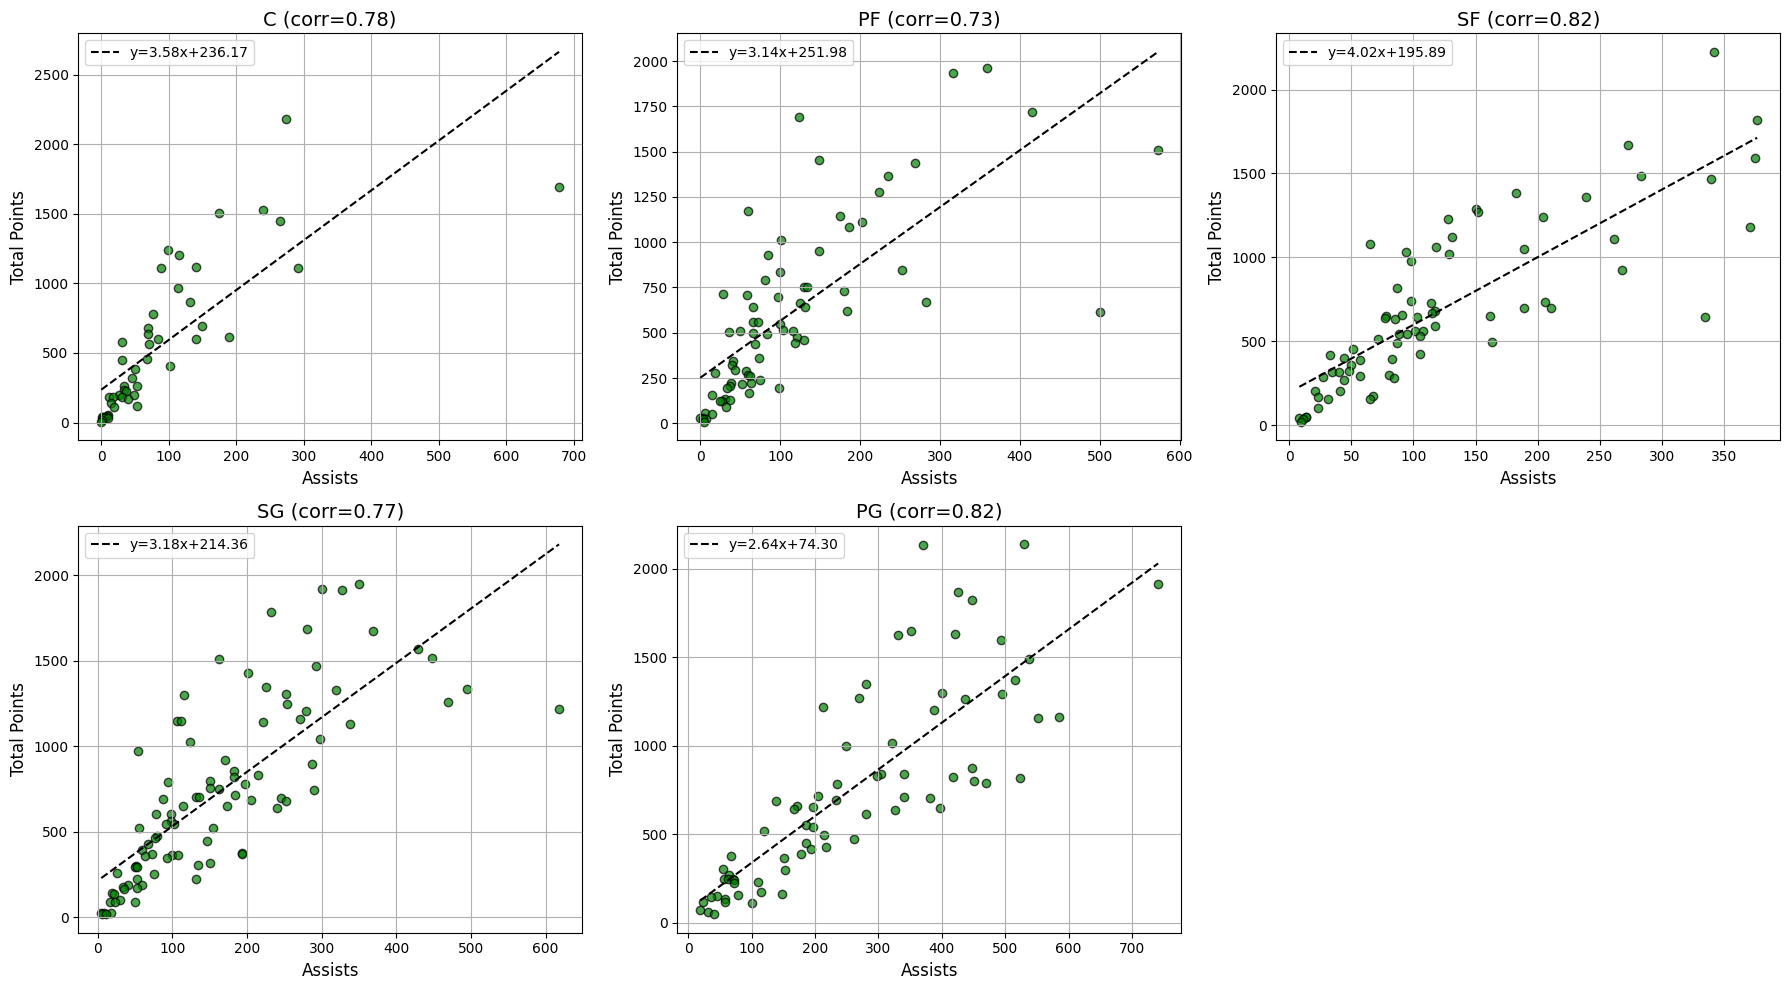


Average Assists and Total Points by Position:
             Assists  Total_Points
Position                          
PG        258.256757    755.837838
SG        160.150538    723.860215
SF        122.410959    688.424658
PF        111.780822    602.876712
C          88.437500    552.791667
F          43.964286    275.553571
G          41.867925    188.094340


In [ ]:
grouped = df.groupby('Position')
result3 = {}
for pos, group in grouped:
    print(pos)
    if group['Total_Points'].count() > 1:
        correlation = group[['Total_Points', 'Assists']].corr().at['Total_Points', 'Assists']
    else:
        correlation = np.nan
    result3[pos] = correlation
corr_series = pd.Series(result3, name='Correlation(Points, Assists)').sort_values(ascending=False)
print("Correlation between Total Points and Assists by Position:")
print(corr_series)

positions_to_plot = ['C', 'PF', 'SF', 'SG', 'PG']

# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, pos in enumerate(positions_to_plot):
    ax = axes[i]
    subset = df[df['Position'] == pos]


    ax.scatter(subset['Assists'], subset['Total_Points'], alpha=0.7, color='green', edgecolors='black')

    # Fit a simple linear regression line to show trend
    # Avoid errors if too few points
    if len(subset) > 2:
        slope, intercept = np.polyfit(subset['Assists'], subset['Total_Points'], 1)
        x_vals = np.linspace(subset['Assists'].min(), subset['Assists'].max(), 100)
        y_vals = slope * x_vals + intercept
        ax.plot(x_vals, y_vals, color='black', linestyle='--', label=f'y={slope:.2f}x+{intercept:.2f}')
        ax.legend()

    ax.set_title(f"{pos} (corr={result3[pos]:.2f})", fontsize=14)
    ax.set_xlabel('Assists', fontsize=12)
    ax.set_ylabel('Total Points', fontsize=12)
    ax.grid(True)

# Remove unused subplot if positions_to_plot < 6
for j in range(len(positions_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Additional Analysis:
# Compare average rebounds and points for Centers vs. other positions to see if high rebounders also tend to be high scorers.
position_summary = df.groupby('Position')[['Assists', 'Total_Points']].mean().sort_values('Assists', ascending=False)
print("\nAverage Assists and Total Points by Position:")
print(position_summary)

G
F
C
PF
SF
SG
PG
Correlation between Total Points and Steals by Position:
C     0.871785
G     0.853729
F     0.816369
PG    0.707998
SF    0.690515
PF    0.669625
SG    0.655215
Name: Correlation(Points, Steals), dtype: float64


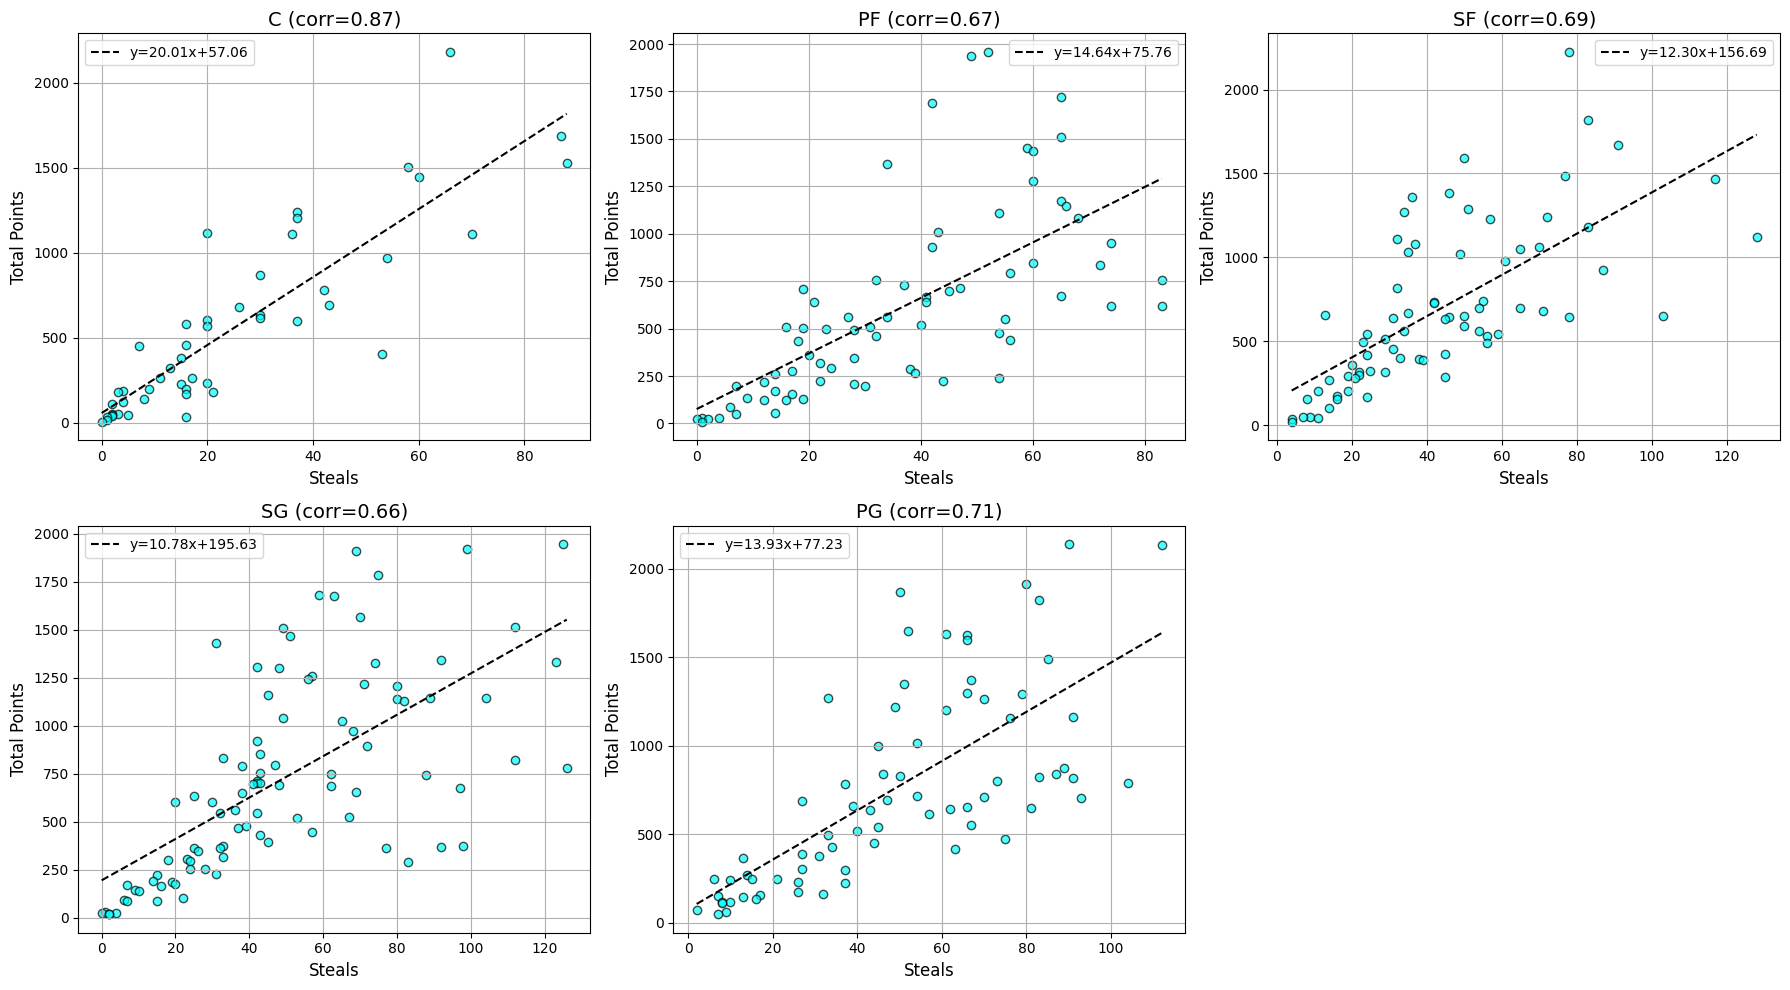


Average Steals and Total Points by Position:
             Steals  Total_Points
Position                         
SG        49.010753    723.860215
PG        48.729730    755.837838
SF        43.232877    688.424658
PF        36.000000    602.876712
C         24.770833    552.791667
F         19.589286    275.553571
G         14.792453    188.094340


In [ ]:
grouped = df.groupby('Position')
result3 = {}
for pos, group in grouped:
    print(pos)
    if group['Steals'].count() > 1:
        correlation = group[['Total_Points', 'Steals']].corr().at['Total_Points', 'Steals']
    else:
        correlation = np.nan
    result3[pos] = correlation
corr_series = pd.Series(result3, name='Correlation(Points, Steals)').sort_values(ascending=False)
print("Correlation between Total Points and Steals by Position:")
print(corr_series)

positions_to_plot = ['C', 'PF', 'SF', 'SG', 'PG']

# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, pos in enumerate(positions_to_plot):
    ax = axes[i]
    subset = df[df['Position'] == pos]


    ax.scatter(subset['Steals'], subset['Total_Points'], alpha=0.7, color='cyan', edgecolors='black')

    # Fit a simple linear regression line to show trend
    # Avoid errors if too few points
    if len(subset) > 2:
        slope, intercept = np.polyfit(subset['Steals'], subset['Total_Points'], 1)
        x_vals = np.linspace(subset['Steals'].min(), subset['Steals'].max(), 100)
        y_vals = slope * x_vals + intercept
        ax.plot(x_vals, y_vals, color='black', linestyle='--', label=f'y={slope:.2f}x+{intercept:.2f}')
        ax.legend()

    ax.set_title(f"{pos} (corr={result3[pos]:.2f})", fontsize=14)
    ax.set_xlabel('Steals', fontsize=12)
    ax.set_ylabel('Total Points', fontsize=12)
    ax.grid(True)

# Remove unused subplot if positions_to_plot < 6
for j in range(len(positions_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Additional Analysis:
# Compare average rebounds and points for Centers vs. other positions to see if high rebounders also tend to be high scorers.
position_summary = df.groupby('Position')[['Steals', 'Total_Points']].mean().sort_values('Steals', ascending=False)
print("\nAverage Steals and Total Points by Position:")
print(position_summary)

G
F
C
PF
SF
SG
PG
Correlation between Total Points and Blocks by Position:
G     0.812511
F     0.710363
C     0.654388
SG    0.611916
PF    0.561470
PG    0.539293
SF    0.382924
Name: Correlation(Points, Blocks), dtype: float64


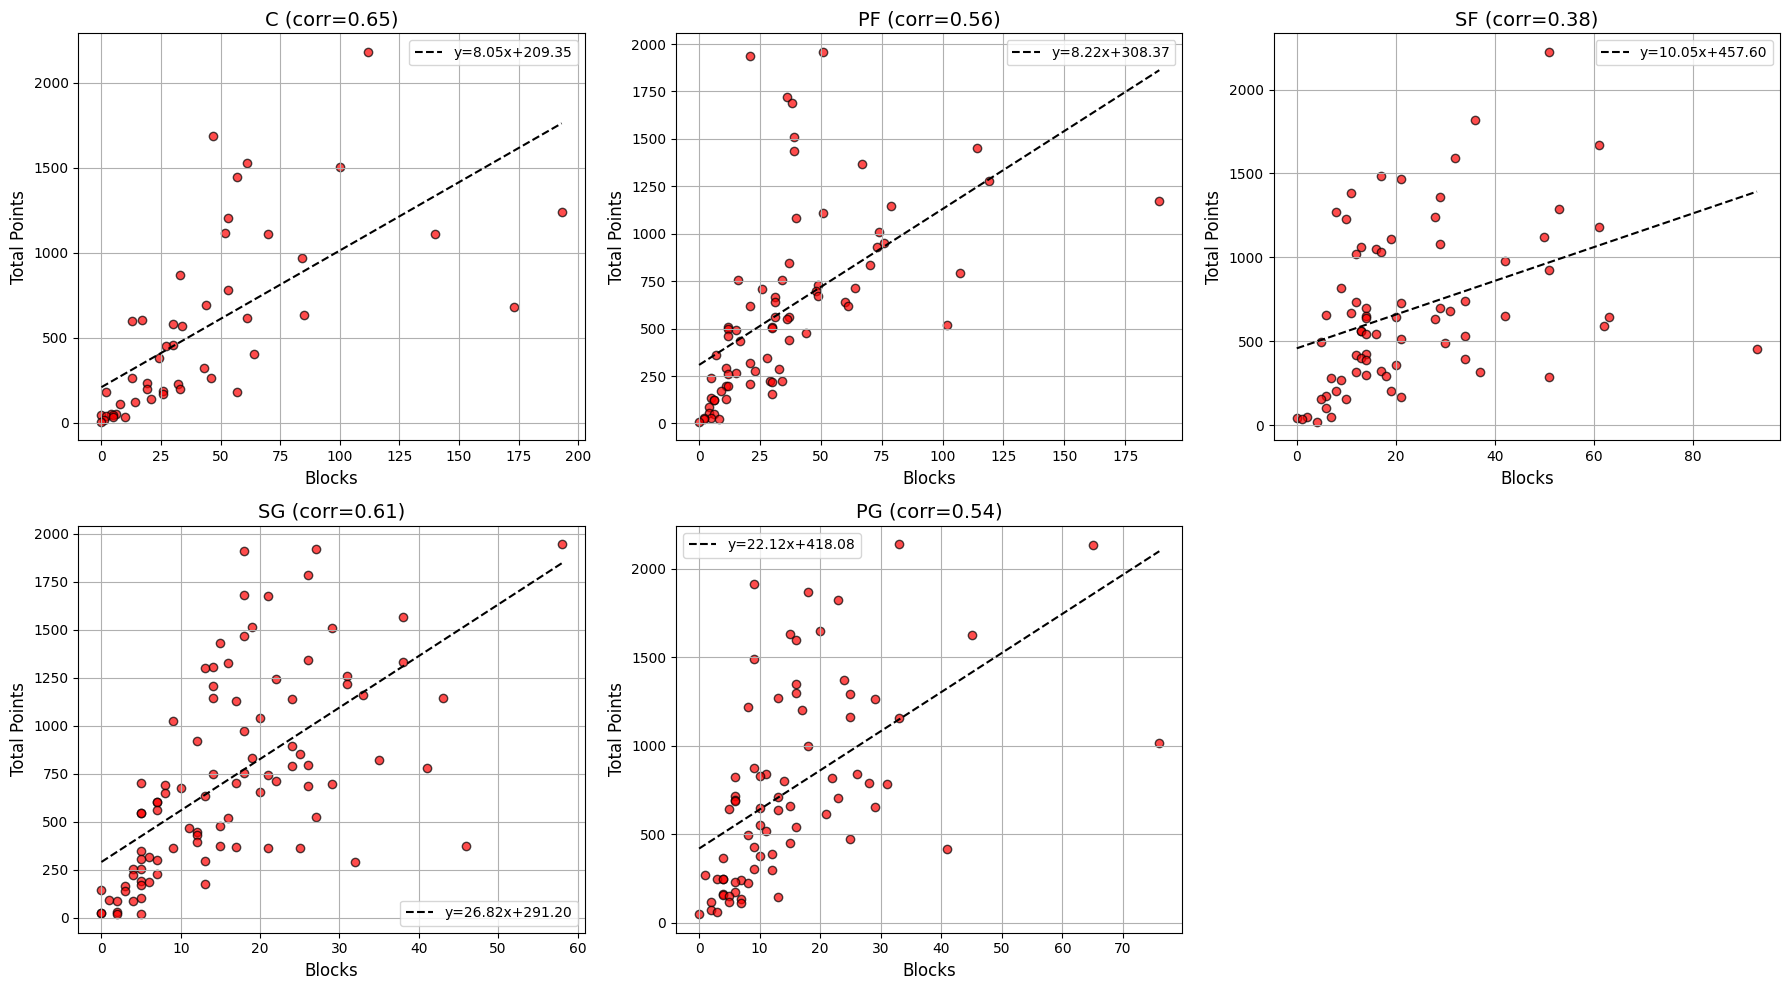


Average Blocks and Total Points by Position:
             Blocks  Total_Points
Position                         
C         42.687500    552.791667
PF        35.821918    602.876712
SF        22.972603    688.424658
SG        16.129032    723.860215
PG        15.270270    755.837838
F         12.589286    275.553571
G          5.245283    188.094340


In [ ]:
grouped = df.groupby('Position')
result3 = {}
for pos, group in grouped:
    print(pos)
    if group['Blocks'].count() > 1:
        correlation = group[['Total_Points', 'Blocks']].corr().at['Total_Points', 'Blocks']
    else:
        correlation = np.nan
    result3[pos] = correlation
corr_series = pd.Series(result3, name='Correlation(Points, Blocks)').sort_values(ascending=False)
print("Correlation between Total Points and Blocks by Position:")
print(corr_series)

positions_to_plot = ['C', 'PF', 'SF', 'SG', 'PG']

# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, pos in enumerate(positions_to_plot):
    ax = axes[i]
    subset = df[df['Position'] == pos]


    ax.scatter(subset['Blocks'], subset['Total_Points'], alpha=0.7, color='red', edgecolors='black')

    # Fit a simple linear regression line to show trend
    # Avoid errors if too few points
    if len(subset) > 2:
        slope, intercept = np.polyfit(subset['Blocks'], subset['Total_Points'], 1)
        x_vals = np.linspace(subset['Blocks'].min(), subset['Blocks'].max(), 100)
        y_vals = slope * x_vals + intercept
        ax.plot(x_vals, y_vals, color='black', linestyle='--', label=f'y={slope:.2f}x+{intercept:.2f}')
        ax.legend()

    ax.set_title(f"{pos} (corr={result3[pos]:.2f})", fontsize=14)
    ax.set_xlabel('Blocks', fontsize=12)
    ax.set_ylabel('Total Points', fontsize=12)
    ax.grid(True)

# Remove unused subplot if positions_to_plot < 6
for j in range(len(positions_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Additional Analysis:
# Compare average rebounds and points for Centers vs. other positions to see if high rebounders also tend to be high scorers.
position_summary = df.groupby('Position')[['Blocks', 'Total_Points']].mean().sort_values('Blocks', ascending=False)
print("\nAverage Blocks and Total Points by Position:")
print(position_summary)

Group_Exterior: Correlation between Total Points and Total Rebounds = 0.687835310375162
Group_Interior: Correlation between Total Points and Total Rebounds = 0.8382136727825777
Group_SF: Correlation between Total Points and Total Rebounds = 0.7841706033069308


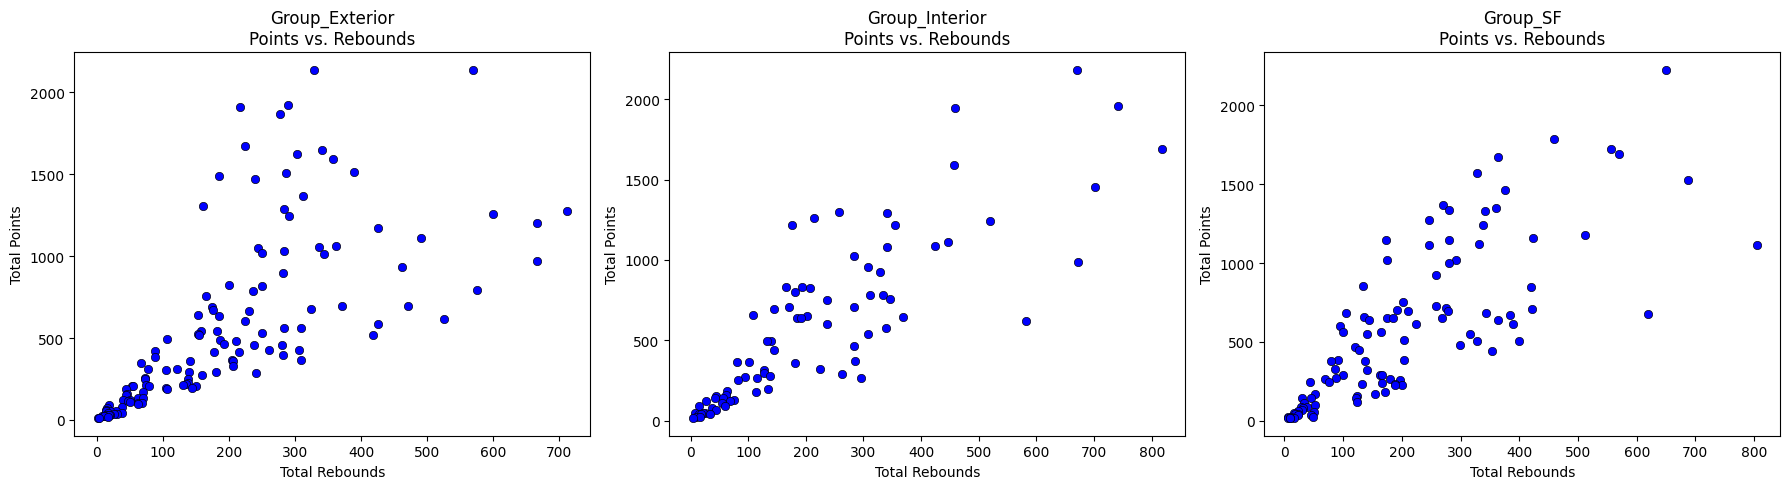

In [ ]:
group_assignments = {
    'Group_Exterior': ['GSW', 'DAL','POR','PHX','CLE','MEM','ATL','OKC'], #G
    'Group_Interior': ['DEN', 'PHI', 'MIL','LAL','MIN'], #interior
    'Group_SF': ['BOS', 'BKN', 'MIA','LAC','NOP','TOR','UTA'] #SF
}

# Invert the dictionary to map each team to its group directly:
team_to_group = {}
for group_name, teams in group_assignments.items():
    for team in teams:
        team_to_group[team] = group_name

df2 = df
df['Team_Group'] = df['Team_Abbreviation'].map(team_to_group)

# Now we can calculate correlation within each group:
grouped = df.groupby('Team_Group')

for group_name, group_data in grouped:
    if len(group_data) > 1:
        corr = group_data[['Total_Points', 'Total_Rebounds']].corr().at['Total_Points', 'Total_Rebounds']

    else:
        corr = None
    print(f"{group_name}: Correlation between Total Points and Total Rebounds = {corr}")


plt.figure(figsize=(18, 5))
for i, (group_name, group_data) in enumerate(grouped, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='Total_Rebounds', y='Total_Points', data=group_data, color='blue', edgecolor='black')
    plt.title(f"{group_name}\nPoints vs. Rebounds")
    plt.xlabel('Total Rebounds')
    plt.ylabel('Total Points')
plt.tight_layout()
plt.show()
df = df2

Group_Exterior: Correlation between Total Points and Assists = 0.8090396292978587
Group_Interior: Correlation between Total Points and Assists = 0.7573049705534094
Group_SF: Correlation between Total Points and Assists = 0.7943512132512601


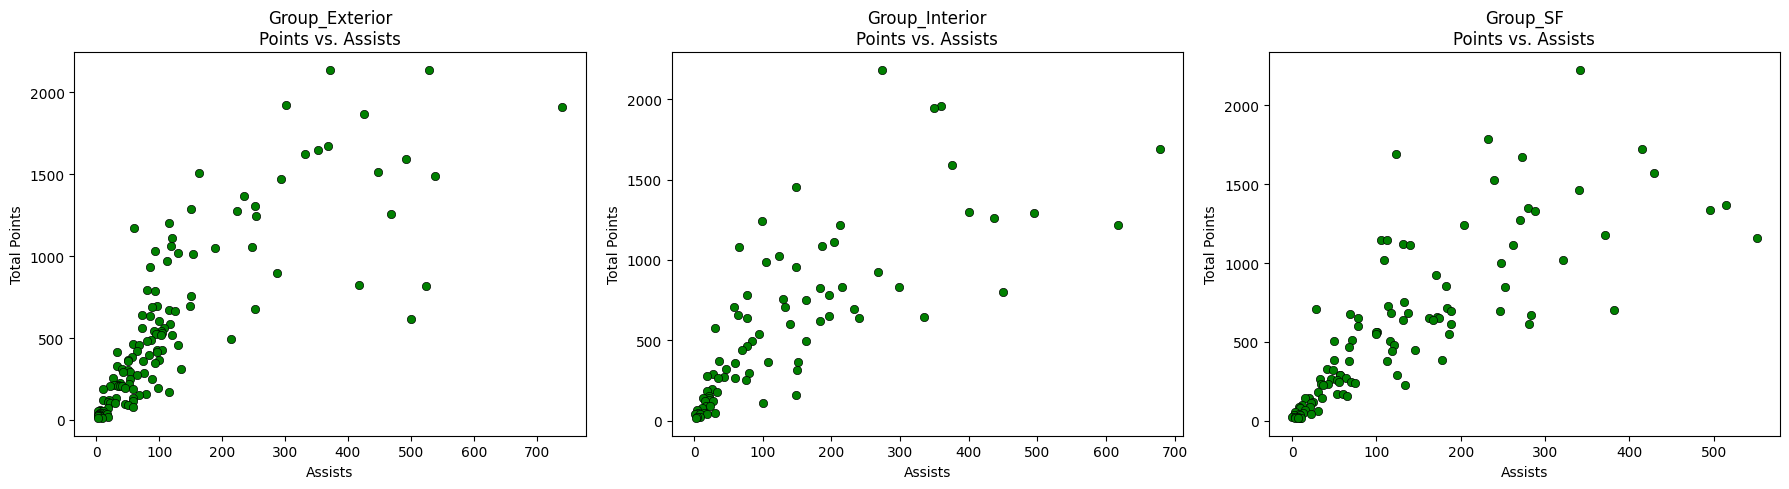

In [ ]:
group_assignments = {
    'Group_Exterior': ['GSW', 'DAL','POR','PHX','CLE','MEM','ATL','OKC'], #G
    'Group_Interior': ['DEN', 'PHI', 'MIL','LAL','MIN'], #interior
    'Group_SF': ['BOS', 'BKN', 'MIA','LAC','NOP','TOR','UTA'] #SF
}

# Invert the dictionary to map each team to its group directly:
team_to_group = {}
for group_name, teams in group_assignments.items():
    for team in teams:
        team_to_group[team] = group_name

df2 = df
df['Team_Group'] = df['Team_Abbreviation'].map(team_to_group)

# Now we can calculate correlation within each group:
grouped = df.groupby('Team_Group')

for group_name, group_data in grouped:
    if len(group_data) > 1:
        corr = group_data[['Total_Points', 'Assists']].corr().at['Total_Points', 'Assists']

    else:
        corr = None
    print(f"{group_name}: Correlation between Total Points and Assists = {corr}")


plt.figure(figsize=(18, 5))
for i, (group_name, group_data) in enumerate(grouped, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='Assists', y='Total_Points', data=group_data, color='green', edgecolor='black')
    plt.title(f"{group_name}\nPoints vs. Assists")
    plt.xlabel('Assists')
    plt.ylabel('Total Points')
plt.tight_layout()
plt.show()
df = df2

Group_Exterior: Correlation between Total Points and Steals = 0.7832086453376232
Group_Interior: Correlation between Total Points and Steals = 0.7294098914325026
Group_SF: Correlation between Total Points and Steals = 0.7651663016422505


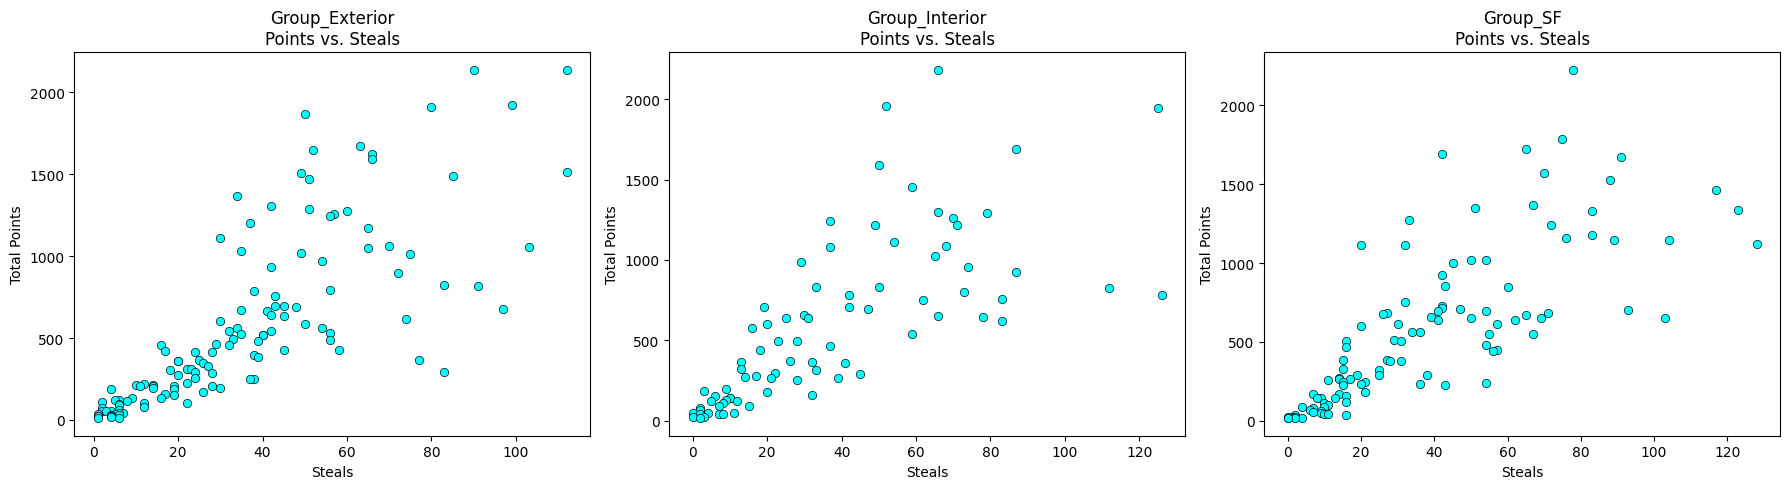

In [ ]:
group_assignments = {
    'Group_Exterior': ['GSW', 'DAL','POR','PHX','CLE','MEM','ATL','OKC'], #G
    'Group_Interior': ['DEN', 'PHI', 'MIL','LAL','MIN'], #interior
    'Group_SF': ['BOS', 'BKN', 'MIA','LAC','NOP','TOR','UTA'] #SF
}

# Invert the dictionary to map each team to its group directly:
team_to_group = {}
for group_name, teams in group_assignments.items():
    for team in teams:
        team_to_group[team] = group_name

df2 = df
df['Team_Group'] = df['Team_Abbreviation'].map(team_to_group)

# Now we can calculate correlation within each group:
grouped = df.groupby('Team_Group')

for group_name, group_data in grouped:
    if len(group_data) > 1:
        corr = group_data[['Total_Points', 'Steals']].corr().at['Total_Points', 'Steals']

    else:
        corr = None
    print(f"{group_name}: Correlation between Total Points and Steals = {corr}")


plt.figure(figsize=(18, 5))
for i, (group_name, group_data) in enumerate(grouped, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='Steals', y='Total_Points', data=group_data, color='cyan', edgecolor='black')
    plt.title(f"{group_name}\nPoints vs. Steals")
    plt.xlabel('Steals')
    plt.ylabel('Total Points')
plt.tight_layout()
plt.show()
df = df2

Group_Exterior: Correlation between Total Points and Blocks = 0.42162805890747507
Group_Interior: Correlation between Total Points and Blocks = 0.6157535676759145
Group_SF: Correlation between Total Points and Blocks = 0.4668389148459676


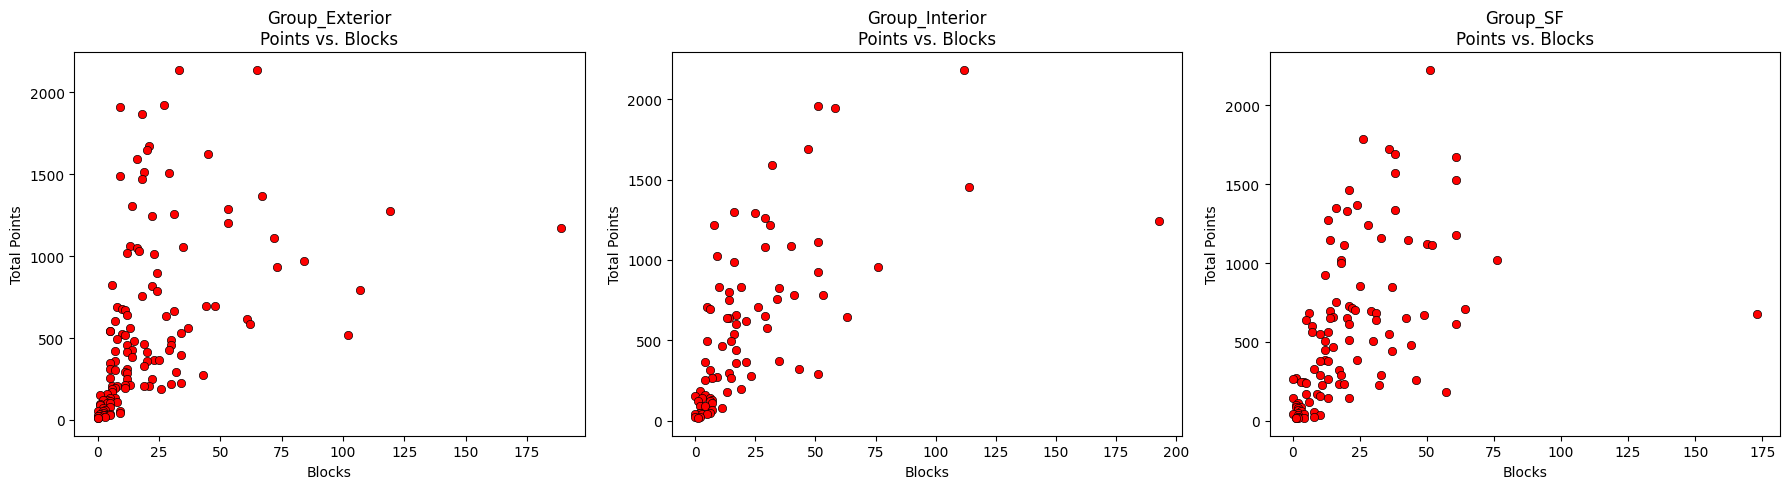

In [ ]:
group_assignments = {
    'Group_Exterior': ['GSW', 'DAL','POR','PHX','CLE','MEM','ATL','OKC'], #G
    'Group_Interior': ['DEN', 'PHI', 'MIL','LAL','MIN'], #interior
    'Group_SF': ['BOS', 'BKN', 'MIA','LAC','NOP','TOR','UTA'] #SF
}

# Invert the dictionary to map each team to its group directly:
team_to_group = {}
for group_name, teams in group_assignments.items():
    for team in teams:
        team_to_group[team] = group_name

df2 = df
df['Team_Group'] = df['Team_Abbreviation'].map(team_to_group)

# Now we can calculate correlation within each group:
grouped = df.groupby('Team_Group')

for group_name, group_data in grouped:
    if len(group_data) > 1:
        corr = group_data[['Total_Points', 'Blocks']].corr().at['Total_Points', 'Blocks']

    else:
        corr = None
    print(f"{group_name}: Correlation between Total Points and Blocks = {corr}")


plt.figure(figsize=(18, 5))
for i, (group_name, group_data) in enumerate(grouped, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='Blocks', y='Total_Points', data=group_data, color='red', edgecolor='black')
    plt.title(f"{group_name}\nPoints vs. Blocks")
    plt.xlabel('Blocks')
    plt.ylabel('Total Points')
plt.tight_layout()
plt.show()
df = df2
# df.drop(columns=['Team_Group'])

# ---------- Original Analyses ----------

### Distribution of players' 'Position's

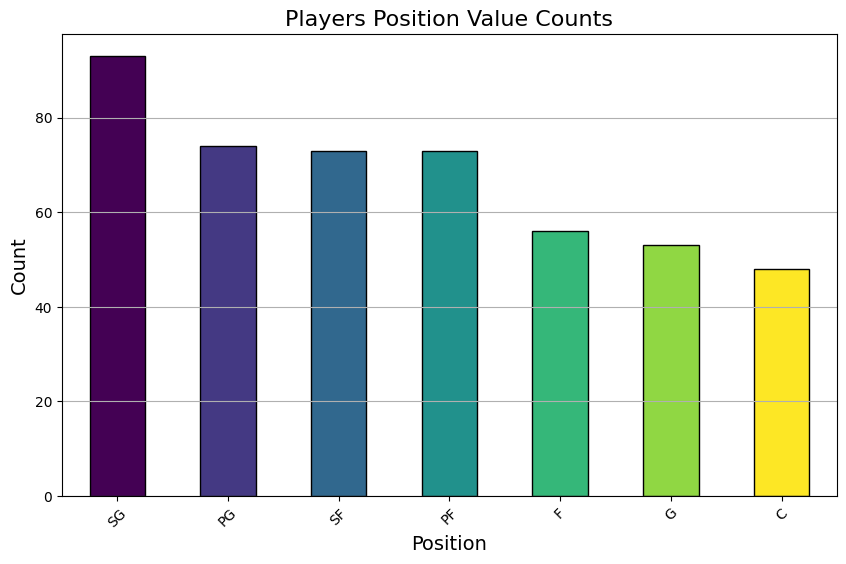

In [ ]:
plt.figure(figsize=(10, 6))
position_counts = df['Position'].value_counts()

# Use a different colormap, e.g., 'viridis'
# or get a colormap using `plt.cm.get_cmap('viridis', len(position_counts))`
# and pass it to `color`
position_counts.plot(kind='bar', color=plt.cm.get_cmap('viridis', len(position_counts)).colors, edgecolor='black')

# Set the title and labels
plt.title('Players Position Value Counts', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

### Distribution of Players' Ages

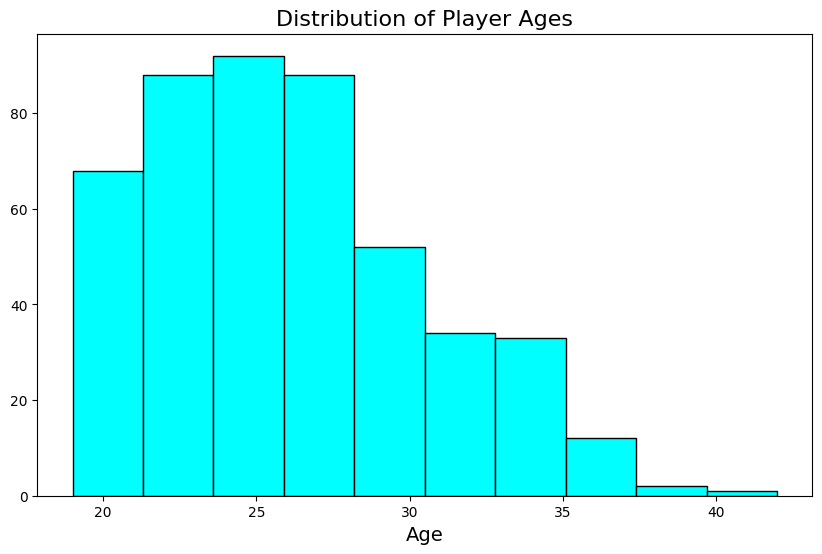

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], color='cyan', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Player Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)

# Show the plot
plt.show()

In [ ]:
df.drop(columns=['Player_Name', 'Position', 'Team_Abbreviation', 'Field_Goals_Made', 'Field_Goals_Attempted', 'Three_Point_FG_Made',
                 'Three_Point_FG_Attempted', 'Three_Point_FG_Percentage', 'NBA_Fantasy_Points', 'Double_Doubles','Free_Throws_Attempted',
                 'Triple_Doubles', 'Offensive_Rebounds', 'Defensive_Rebounds', 'Team_Group', 'Minutes_Played','Free_Throws_Made'],
        inplace=True)

In [ ]:
X = df.drop('Total_Points',axis = 1)
y = df['Total_Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Linear Regression

In [ ]:
df.head()

Age  Games_Played  Wins  Losses  Total_Points  Field_Goal_Percentage  \
0   25            74    52      22          2225                   46.6   
1   29            66    43      23          2183                   54.8   
2   24            66    33      33          2138                   49.6   
3   24            68    33      35          2135                   51.0   
4   28            63    47      16          1959                   55.3   

   Free_Throw_Percentage  Total_Rebounds  Assists  Turnovers  Steals  Blocks  \
0                   85.4             649      342        213      78      51   
1                   85.7             670      274        226      66     112   
2                   74.2             569      529        236      90      33   
3                   90.5             329      371        192     112      65   
4                   64.5             742      359        246      52      51   

   Personal_Fouls  Plus_Minus  
0             160         470  
1             205         424  
2             166         128  
3             192         149  
4             197         341

In [ ]:
model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.15
Best random state: 313
Best R2 score: 0.8949530683754745


In [ ]:
X.keys()

Index(['Age', 'Games_Played', 'Wins', 'Losses', 'Field_Goal_Percentage',
       'Free_Throw_Percentage', 'Total_Rebounds', 'Assists', 'Turnovers',
       'Steals', 'Blocks', 'Personal_Fouls', 'Plus_Minus'],
      dtype='object')

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=.2, random_state=43)

LRmodel = LinearRegression(fit_intercept=True)
LRmodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LRmodel.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


R-squared score: 0.8642194575729978


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test , y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=.2, random_state=43)

LRmodel = LinearRegression(fit_intercept=True)
LRmodel.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(LRmodel.coef_, index=X_train.columns).abs()
top_3_features = feature_importances.sort_values(ascending=False).head(3).index.tolist()

print(f"The 3 features that contribute the most to the regression are: {top_3_features}")

The 3 features that contribute the most to the regression are: ['Turnovers', 'Free_Throw_Percentage', 'Steals']


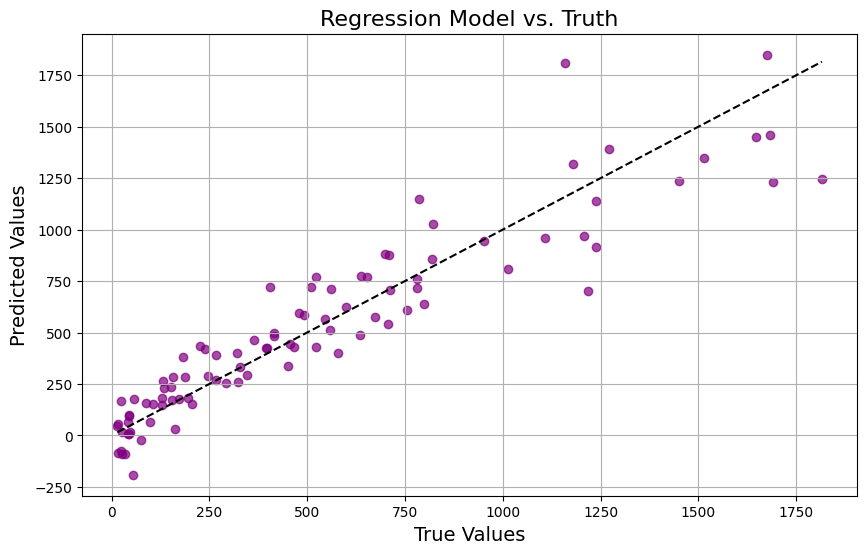

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Regression Model vs. Truth", fontsize=16)
plt.grid(True)
plt.show()

# XGBoost

Mean Squared Error: 29143.541482524764
R-squared score: 0.8672407865524292
                  Feature  Importance
8               Turnovers    0.885941
11         Personal_Fouls    0.024305
6          Total_Rebounds    0.021919
9                  Steals    0.012286
5   Free_Throw_Percentage    0.009498
12             Plus_Minus    0.008813
1            Games_Played    0.007651
10                 Blocks    0.006792
7                 Assists    0.005477
3                  Losses    0.005357
2                    Wins    0.004895
4   Field_Goal_Percentage    0.004149
0                     Age    0.002917


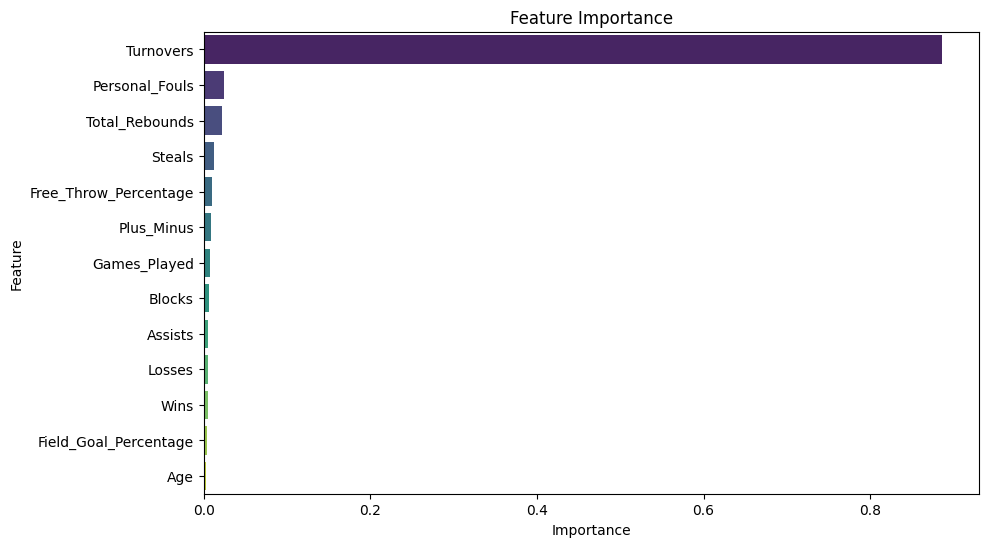

In [ ]:
import xgboost as xgb

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred_xgb)
print(f"R-squared score: {r2}")
# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title('Feature Importance')
plt.show()

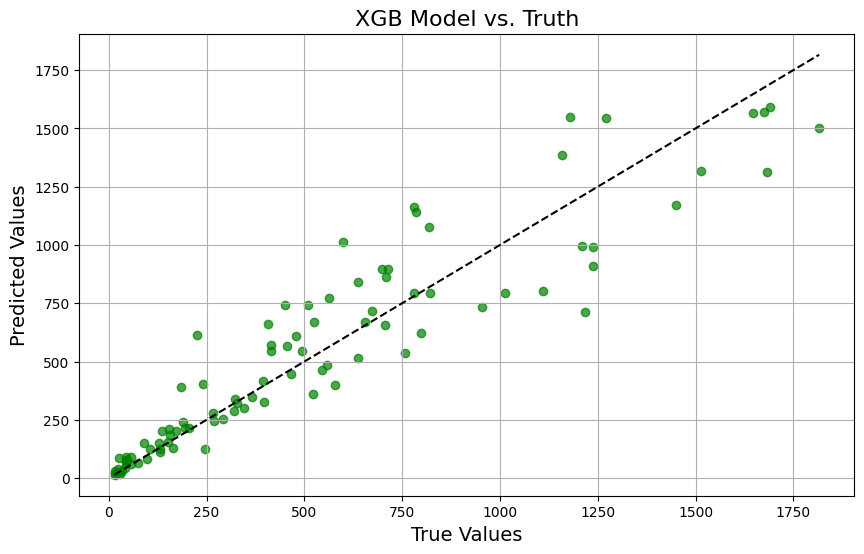

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("XGB Model vs. Truth", fontsize=16)
plt.grid(True)
plt.show()

# KNN Regression

In [ ]:
model = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.15
Best random state: 313
Best R2 score: 0.8425320734894028


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.2, random_state=0)

KNNmodel = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(3,11,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_mse_score = -grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best MSE score: {best_mse_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {test_mse}")

grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best MSE score: 45289.32688554943
Best hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
MSE score on test set: 48777.00817422116
Best R2 score: 0.8169333146123986
Best hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
R2 score on test set: 0.8023245580364885


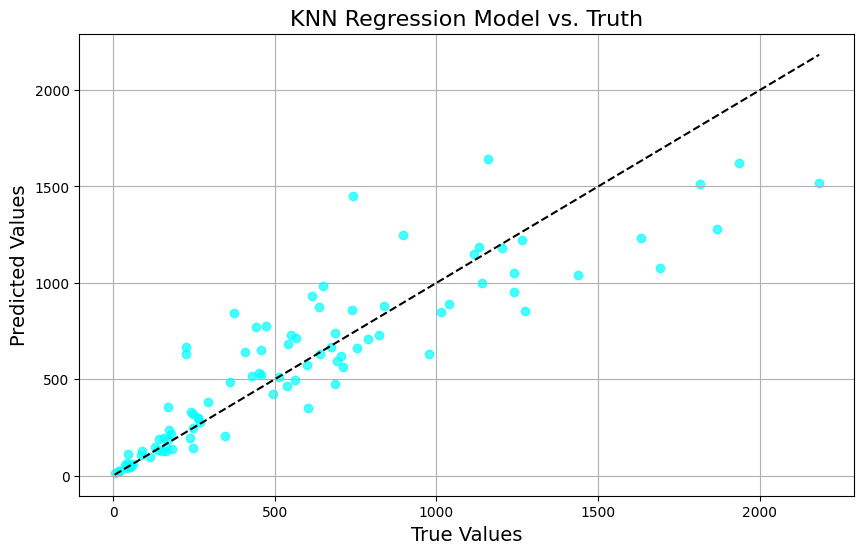

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='cyan', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("KNN Regression Model vs. Truth", fontsize=16)
plt.grid(True)
plt.show()

# Decision Tree

In [ ]:
model = DecisionTreeRegressor()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 0
Best R2 score: 0.8113488030329388


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.2, random_state=100)

DTRmodel = DecisionTreeRegressor()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=DTRmodel, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_mse_score = -grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best MSE score: {best_mse_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {test_mse}")

grid_search = GridSearchCV(estimator=DTRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best MSE score: 49211.143326167
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 15}
MSE score on test set: 46500.99661683137
Best R2 score: 0.8008924180940973
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 15}
R2 score on test set: 0.8046386101303202


In [ ]:
# Get feature importances
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Print the top 3 most important features
top_3_features = feature_importances.sort_values(ascending=False).head(3)
print("Top 3 important features:")
top_3_features

Top 3 important features:


Turnovers         0.905953
Plus_Minus        0.026124
Personal_Fouls    0.022455
dtype: float64

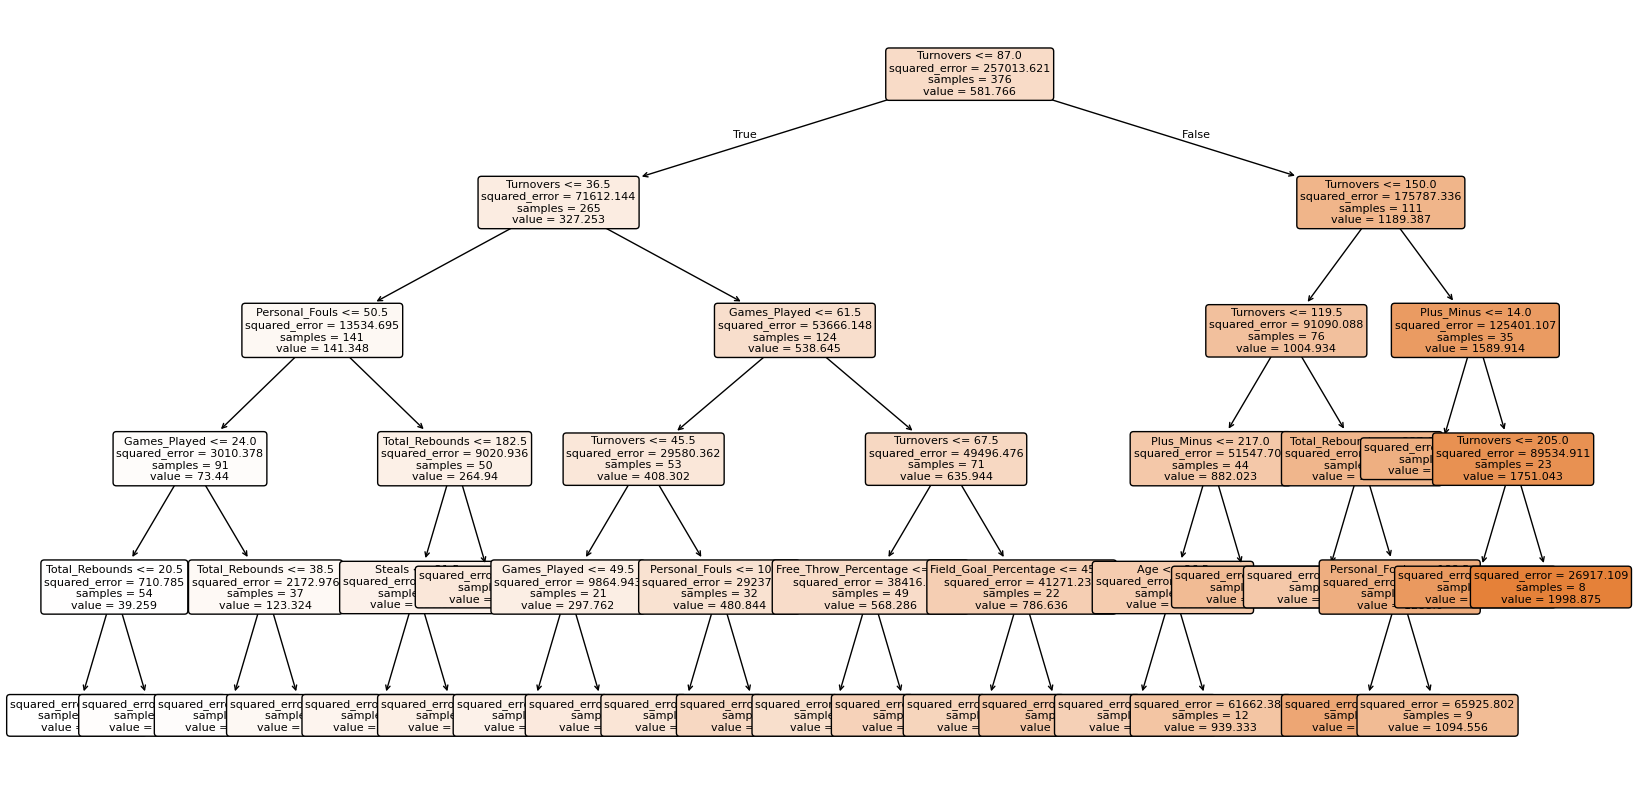

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()

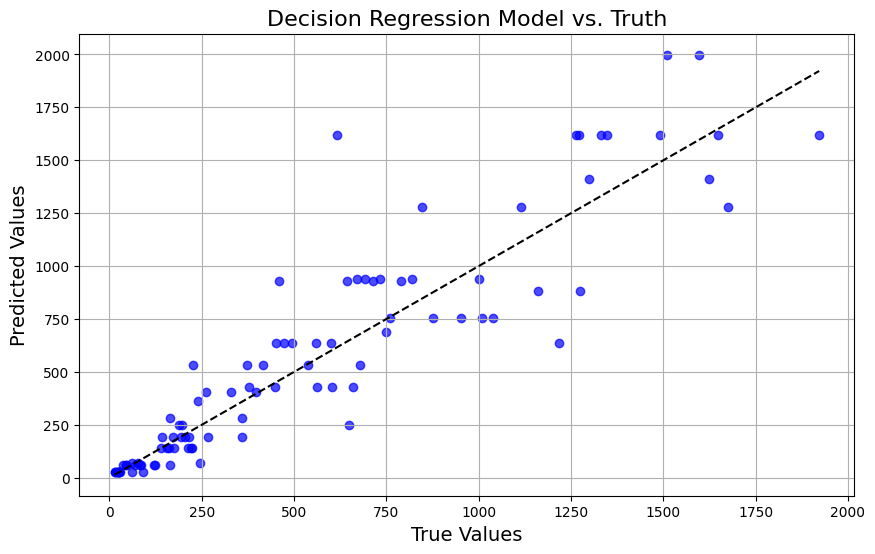

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_test and y_pred are defined from your KNN model training
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Decision Regression Model vs. Truth", fontsize=16)
plt.grid(True)
plt.show()

# Random Forest

In [ ]:
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=test_size, random_state=random_state)
        model = RandomForestRegressor(n_estimators=100, max_depth=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 42
Best R2 score: 0.8911101775857881


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Total_Points', axis=1), df['Total_Points'], test_size=0.1, random_state=0)

RFRmodel = RandomForestRegressor()

param_grid = {
    'n_estimators': range(80,160,10),
    'max_depth': range(1,20,2),
}

grid_search = GridSearchCV(estimator=RFRmodel, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_mse_score = -grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best MSE score: {best_mse_score}")
print(f"Best hyperparameters: {best_params}")

best_RFRmodel = grid_search.best_estimator_
y_pred = best_RFRmodel.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"MSE score on test set: {test_mse}")

grid_search = GridSearchCV(estimator=RFRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_RFRmodel = grid_search.best_estimator_
y_pred = best_RFRmodel.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best MSE score: 32386.577733103717
Best hyperparameters: {'max_depth': 19, 'n_estimators': 140}
MSE score on test set: 39650.499158977414
Best R2 score: 0.8694212222645369
Best hyperparameters: {'max_depth': 13, 'n_estimators': 130}
R2 score on test set: 0.8693876730804158


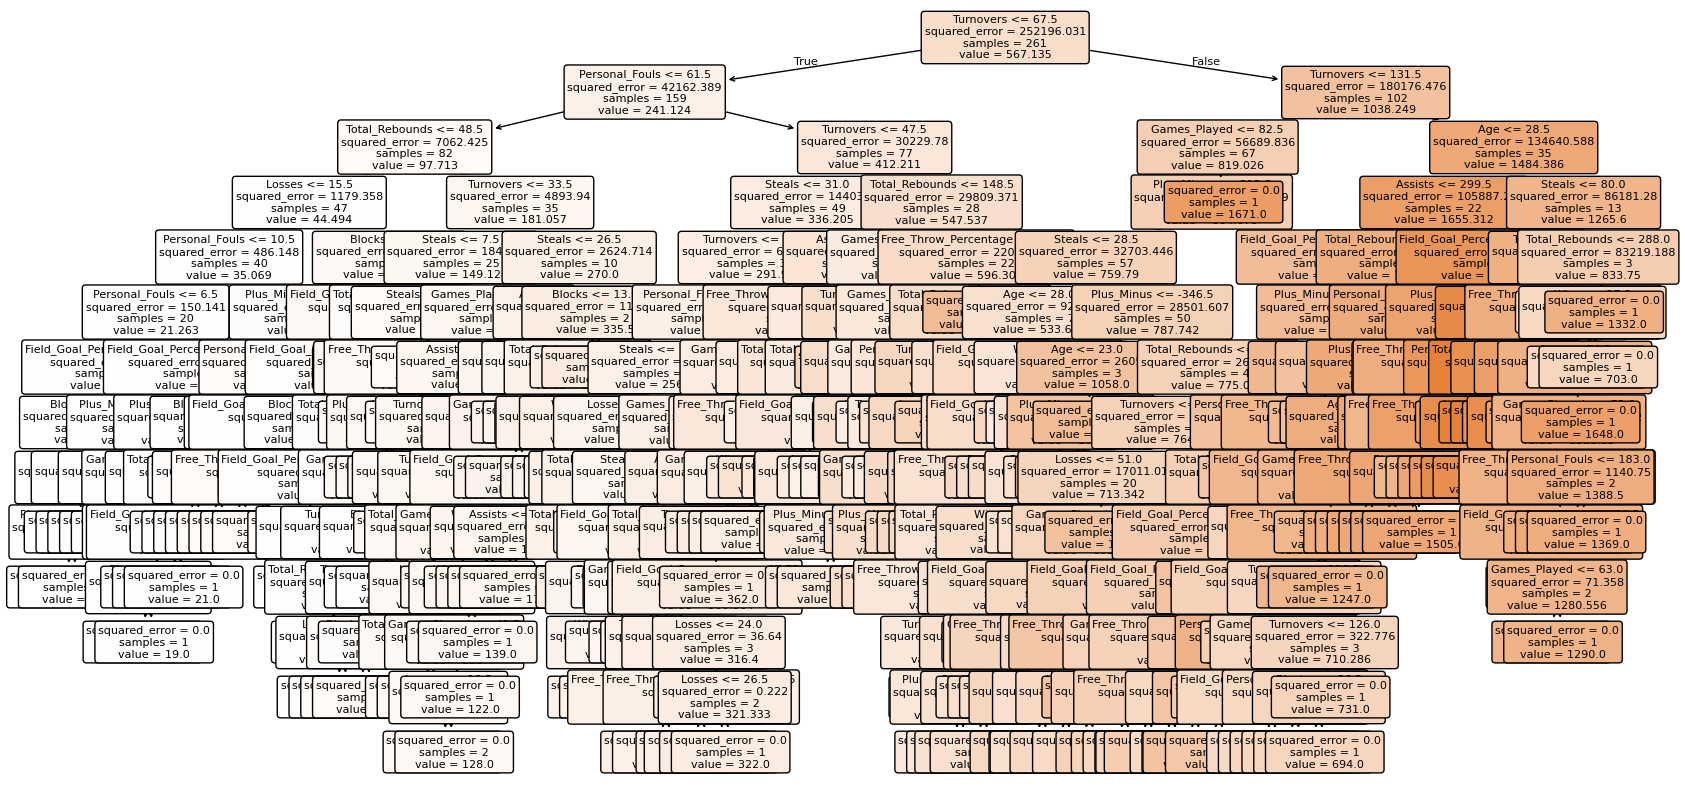

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
# Plot the first tree in the forest
plot_tree(best_RFRmodel.estimators_[0], feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.show()

# MLP

R-squared score for MLP: 0.8932061238822089
MSE score for MLP: 31676.27672667696


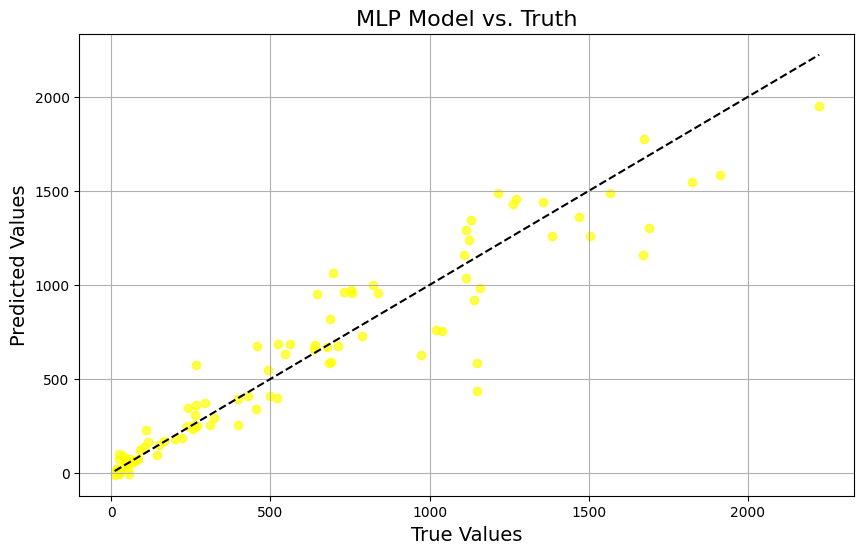

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_mlp)
print(f"R-squared score for MLP: {r2}")

mse = mean_squared_error(y_test, y_pred_mlp)
print(f"MSE score for MLP: {mse}")

# Plot the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, color='yellow', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("MLP Model vs. Truth", fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
X.keys()

Index(['Age', 'Games_Played', 'Wins', 'Losses', 'Field_Goal_Percentage',
       'Free_Throw_Percentage', 'Total_Rebounds', 'Assists', 'Turnovers',
       'Steals', 'Blocks', 'Personal_Fouls', 'Plus_Minus'],
      dtype='object')